# <center> Ανάλυση Δεδομένων - Εφαρμογή στη Φυσική </center>
## <center> Χαρακτηρισμός υλικού με τη μέθοδο της φασματοσκοπίας Raman </center>
----

### Στόχος
Σκοπός αυτού του project είναι να δούμε μία **ρουτίνα εργασίας όταν πρόκειται να αναλύσουμε τα δεδομένα από ένα φάσμα Raman**. Για τον σκοπό αυτό, θα κατασκευάσουμε ένα συνθετικό φάσμα Raman ως μία μίξη ξεχωριστών φασμάτων κάποιων συστατικών στοιχείων. Το φάσμα κάθε στοιχείου αποτελείται με τη σειρά του από έναν συγκεκριμένο αριθμό Γκαουσιανών κορυφών.
Για να κάνουμε τα δεδομένα μας πιο αληθοφανή και παρόμοια με αυτά που θα λαμβάναμε από ένα πραγματικό πείραμα φασματοσκοπίας θα προσθέσουμε διάφορες πηγές θορύβου.
    

**Αυτό το στάδιο έχει ήδη υλοποιηθεί από τους διδάσκοντες** και τα δεδομένα που προέκυψαν σας έχουν δοθεί σε ένα αρχείο csv με το όνομα ``raman_spectrum.csv``. Μπορείτε, εάν επιθυμείτε, να πειραματιστείτε με την κλάση ``mspec.py`` που δημιουργήσαμε για να κατασκευάσουμε το συνθετικό φάσμα, φτιάχνοντας τα δικά σας φάσματα με διαφορετικά χαρακτηριστικά. Για να το κάνετε αυτό, διαβάστε τα παραδείγματα που ετοιμάσαμε για εσάς στο αντίστοιχο σημειωματάριο.

***Ο δικός σας στόχος είναι διπλός: Πρώτον, θα πρέπει να επεξεργαστείτε το φάσμα με κατάλληλο τρόπο ώστε να το προετοιμάσετε για την ανάλυση.*** Αυτό το στάδιο αναφέρεται συχνά ως "προ-επεξεργασία" και σε αυτό θα πρέπει να καθαρίσετε το φάσμα από τον θόρυβο χρησιμοποιώντας τεχνικές που αναφέρονται στο θεωρητικό κομμάτι αυτού του σημειωματάριου.

Όταν ολοκληρώσετε το στάδιο της προ-επεξεργασίας το φάσμα σας θα είναι έτοιμο για ανάλυση και εξαγωγή των επιθυμητών χαρακτηριστικών. Το πρόβλημα είναι ότι δεν γνωρίζετε ούτε τον αριθμό των ξεχωριστών φασμάτων (συστατικών) που χρησιμοποιήσαμε για να φτιάξουμε το τελικό φάσμα, ούτε και τις συγκεντρώσεις του κάθε συστατικού. Η αποδόμηση (deconvolution) ενός φάσματος που αποτελεί μία μίξη Γκαουσιανών μπορεί να εξελιχθεί σε μία επίπονη διαδικασία και ενώ υπάρχουν διάφορες τεχνικές και εργαλεία για να επιτευχθει αυτό, όλες ξεφεύγουν από τα πλαίσια αυτού του project.

Παρ' όλα αυτά, θα μπορούσε κανείς να έχει μία εκτίμηση για τον αριθμό, το είδος και τις συγκεντρώσεις των συστατικών στοιχείων του φάσματος συγκρίνοντας τις κορυφές του φάσματος με κορυφές φασμάτων από κάποια βάση δεδομένων που θα σας παρέχεται. **Αυτού του είδους η φασματική ανάλυση αποτελεί τον δεύτερο στόχο σας γι' αυτό το project**.


> Για μια σύντομη εισαγωγή στην ρουτίνα ανάλυσης δεδομένων που χρησιμοποιείται συνήθως για την ανάλυση των φασμάτων Raman δείτε την εργασία των Ryabchykov, Guo και Bocklitz: [Ryabchykov, O., Guo, S., & Bocklitz, T. (2019), Analyzing Raman spectroscopic data, Physical Sciences Reviews, 4(2)](https://www.degruyter.com/document/doi/10.1515/9783110515312-004/pdf).
>
> Μια πιο σφαιρική προσέγγιση στην φασματοσκοπία Raman μπορείτε να βρείτε στο σύγραμμα των Ewen Smith και Geoffrey Dent: [Modern Raman Spectroscopy – A Practical Approach](https://www.chemistry.uoc.gr/lapkin/Modern_Raman_Spectroscopy__A_Practical_Approach.pdf).



Το παρόν σημειωματάριο χωρίζεται σε τέσσερα μέρη:

1. Το θεωρητικό υπόβαθρο που αποτελεί μία μικρή εισαγωγή στις έννοιες που θα συνατήσετε και τις τεχνικές που θα χρειαστείτε για να φέρετε εις περάς την ανάλυση του φάσματος.


2. Την προετοιμασία των δεδομένων για το στάδιο της προ-επεξεργασίας του φάσματος. Αυτό περιλαμβάνει το διάβασμα και τον καθαρισμό των δεδομένων από διάφορες ατέλειες που μπορεί να επιβαρύνουν το αρχείο των δεδομένων (π.χ. κενές εγγραφές).


3. Την προ-επεξεργασία του φάσματος. Αυτό περιλαμβάνει την αναγνώριση και την αφαίρεση πηγών θορύβου αλλά και την εξομάλυνση του φάσματος πριν την τελική ανάλυση.


4. Την ανάλυση του φάσματος με σκοπό τον προσδιορισμό κάποιων μοριακών δονήσεων που περιέχονται σε αυτό το (θεωρητικό) υλικό. 

----

## Θεωρητικό υπόβαθρο

Η φασματοσκοπία Raman είναι μια μη-καταστρεπτική τεχνική χημικής ανάλυσης που παρέχει λεπτομερείς πληροφορίες σχετικά με τη χημική δομή, τη φάση, την πολυμορφία και την κρυσταλλικότητα του δείγματος καθώς και τις μοριακές αλληλεπιδράσεις μέσα σε ένα υλικό. Η τεχνική αυτή βασίζεται στην αλληλεπίδραση του φωτός με τους χημικούς δεσμούς μέσα στο υλικό μέσω του φαινομένου της σκέδασης Raman. 

Λόγω των ιδιοτήτων της, η φασματοσκοπία Raman χρησιμοποιείται συνήθως για να παρέχει ένα δομικό "δακτυλικό αποτύπωμα" με το οποίο μπορούν να αναγνωριστούν τα μόρια που περιέχονται σε ένα δείγμα ενός υλικού. Αυτό την καθιστά μία ιδιαίτερα δημοφιλής τεχνική σε πάρα πολλά πεδία όπως η Ιατρική, η Βιολογία και η Φαρμοκολογία (ταυτοποίηση ενεργών φαρμακευτικών συστατικών, μελέτη συλλογικών κινήσεων σε πρωτεΐνες και DNA και των βιολογικών τους λειτουργιών), στη Φυσική (χαρακτηρισμός υλικών και εύρεση προσανατολισμού ασυμμετρικών κρυστάλλων), στη Χημεία,  στη Νανοτεχνολογία, αλλά και στην Αρχαιολογία για την ανάλυση των προϊόντων διάβρωσης στις επιφάνειες των τεχνουργημάτων (αγάλματα, αγγεία, κ.λπ.) που μπορεί να βοηθήσει στον προσδιορισμό της αυθεντικότητας των πολύτιμων ιστορικών αντικειμένων.


### Το φαινόμενο της σκέδασης Raman

Όταν μονοχρωματική ηλεκτρομαγνητική ακτινοβολία συχνότητας $\omega_i$ προσπίπτει σε ένα μέσο, αυτή σκεδάζεται σε διάφορες γωνίες. Από την ανάλυση του φάσματος συχνοτήτων της σκεδαζόμενης ακτινοβολίας παρατηρούνται δύο κύριες κατηγορίες σκέδασης, η **ελαστική** και η **ανελαστική**. Στην πρώτη, η σκεδαζόμενη ακτινοβολία έχει συχνότητα ίδια με αυτήν της προσπίπτουσας $\omega_i$ ενώ στη δεύτερη η συχνότητα διαφέρει κατά $d\omega$ από την $\omega_i$. Αν η ελαστικά σκεδαζόμενη ακτινοβολία έχει προκύψει από κέντρα σκέδασης με διάσταση μικρότερη ή συγκρίσιμη με το μήκος κύματος της προσπίπτουσας ακτινοβολίας (π.χ. μόρια) ή μεγαλύτερα από αυτήν (π.χ. σκόνη στην επιφάνεια του δείγματος), τότε η σκέδαση είναι ελαστική και ονομάζεται ``σκέδαση Rayleigh`` και ``σκέδαση Mie``, αντίστοιχα. Ο διαχωρισμός τους, όμως, στη στερεά κατάσταση είναι δύσκολος οπότε και αναφέρονται με το γενικό όρο σκέδαση Rayleigh.


**Η ανελαστική σκέδαση οφείλεται στην αλληλεπίδραση του φωτός με τις στοιχειώδεις διεγέρσεις ενός μέσου, συμπεριλαμβανομένων των δονήσεων των ατόμων σε μόρια ή τις συλλογικές δονητικές διεγέρσεις του πλέγματος ενός κρυσταλλικού στερεού.** Αν οι διεγέρσεις αυτές είναι ακουστικές (ταλαντώσεις του πλέγματος που διεγείρονται από κύματα πίεσης ή ηχητικά κύματα - ακουστικά φωνόνια) τότε η σκέδαση ονομάζεται ``σκέδαση Brillouin`` και τυπικά αφορά σε συχνοτικές τιμές $0 - 1$ cm$^{-1}$ σε σχέση με την ελαστικά σκεδαζόμενη ακτινοβολία Rayleigh. Από την άλλη, αν τα φωνόνια είναι οπτικά (οι ταλαντώσεις που διεγείρονται με φως μιας ορισμένης συχνότητας) τότε η σκέδαση ονομάζεται ``σκέδαση Raman`` με τυπικές συχνοτικές τιμές $100 - 1000$ cm$^{-1}$ (αναφορικά με τη Rayleigh) για τα ανόργανα υλικά ενώ στα οργανικά υλικά και τους αντίστοιχους μοριακούς κρυστάλλους το συχνοτικό εύρος είναι μεγαλύτερο ξεκινώντας χαμηλότερα από $100$ cm$^{-1}$ και φτάνοντας πολλές φορές και τους $3000$ cm$^{-1}$.


Η περιγραφή του φαινομένου Raman μπορεί να γίνει τόσο κβαντομηχανικά όσο και μέσω της κλασσικής φυσικής. Η διαφορά έγκειται στο ότι μέσω της κλασσικής θεώρησης η σύνδεση του φάσματος Raman ενός υλικού με τις ιδιότητες, για παράδειγμα, των μορίων μπορεί να γίνει μόνο  ποιοτικά ενώ η κβαντομηχανική παρέχει τη δυνατότητα αυτή η σύνδεση να γίνει ποσοτική αλλά και προσφέρει το έδαφος για τη σωστή αντιμετώπιση των μοριακών περιστροφών και δονήσεων. Έτσι, σχηματίζεται μια πιο πλήρης εικόνα για τους παράγοντες που επηρεάζουν τη σκεδαζόμενη ακτινοβολία.


<!-- Όπως γνωρίζουμε, η ανελαστική σκέδαση του φωτός είναι η σκέδαση του φωτός από ένα οπτικό μέσο με αποτέλεσμα τη μεταβολή της συχνότητάς του, εν αντιθέσει με την ελαστική σκέδαση, όπου η συχνότητα του φωτός παραμένει αμετάβλητη. Η ανελαστική σκέδαση του φωτός γίνεται από στοιχειώδεις διεγέρσεις ενός υλικού, όπως τα φωνόνια (ταλαντώσεις πλέγματος), μαγνόνια (κύματα spin), πλασμόνια (συλλογική διέγερση ηλεκτρονίων) κ.λπ.

Η ανελαστική σκέδαση απο τα φωνόνια μπορεί να γίνει από δύο ειδών φωνόνια, τα οπτικά και τα ακουστικά. Τα ακουστικά φωνόνια είναι οι ταλαντώσεις του πλέγματος που διεγείρονται από κύματα πίεσης ή ηχητικά κύματα, ενώ τα οπτικά φωνόνια είναι οι ταλαντώσεις που διεγείρονται με φως μιας ορισμένης συχνότητας. Η ανελαστική σκέδαση του φωτός από τα οπτικά φωνόνια καλείται **σκέδαση Raman**, ενώ αυτή από τα ακουστικά φωνόνια καλείται **σκέδαση Brillouin**. -->

> **Με λίγα λόγια**
>
>Για την επίτευξη της φασματοσκοπίας Raman χρησιμοποιείται μια πηγή μονοχρωματικού φωτός, συνήθως κάποιο laser στα ορατά μήκη κύματος, τα φωτόνια του οποίου σκεδάζονται από κάποιο μόριο του υλικού πάνω στο οποίο προσπίπτουν. Το μεγαλύτερο μέρος του σκεδαζόμενου φωτός είναι στο ίδιο μήκος κύματος με την πηγή laser και δεν παρέχει χρήσιμες πληροφορίες - αυτό ονομάζεται **σκέδαση Rayleigh**. Ωστόσο, μια μικρή ποσότητα φωτός (συνήθως 0,0000001%) σκεδάζεται σε διαφορετικά μήκη κύματος, λόγω της αλληλεπίδρασης των φωτονίων του laser με μοριακές δονήσεις, φωνόνια (ταλαντώσεις πλέγματος), μαγνόνια (κύματα spin), πλασμόνια (συλλογική διέγερση ηλεκτρονίων) ή άλλες διεγέρσεις στο σύστημα - αυτό ονομάζεται **σκέδαση Raman**. Αυτά τα μήκη κύματος εξαρτώνται από τη χημική δομή της αναλυόμενης ουσίας και έχουν ως αποτέλεσμα η ενέργεια των φωτονίων του laser να μετατοπίζεται είτε προς τα πάνω (μικρότερα μήκη κύματος - blueshifted) είτε προς τα κάτω (μεγαλύτερα μήκη κύματος - redshifted). Η μετατόπιση/μεταβολή της ενέργειας δίνει πληροφορίες για τους τρόπους δόνησης στο σύστημα.


<div>
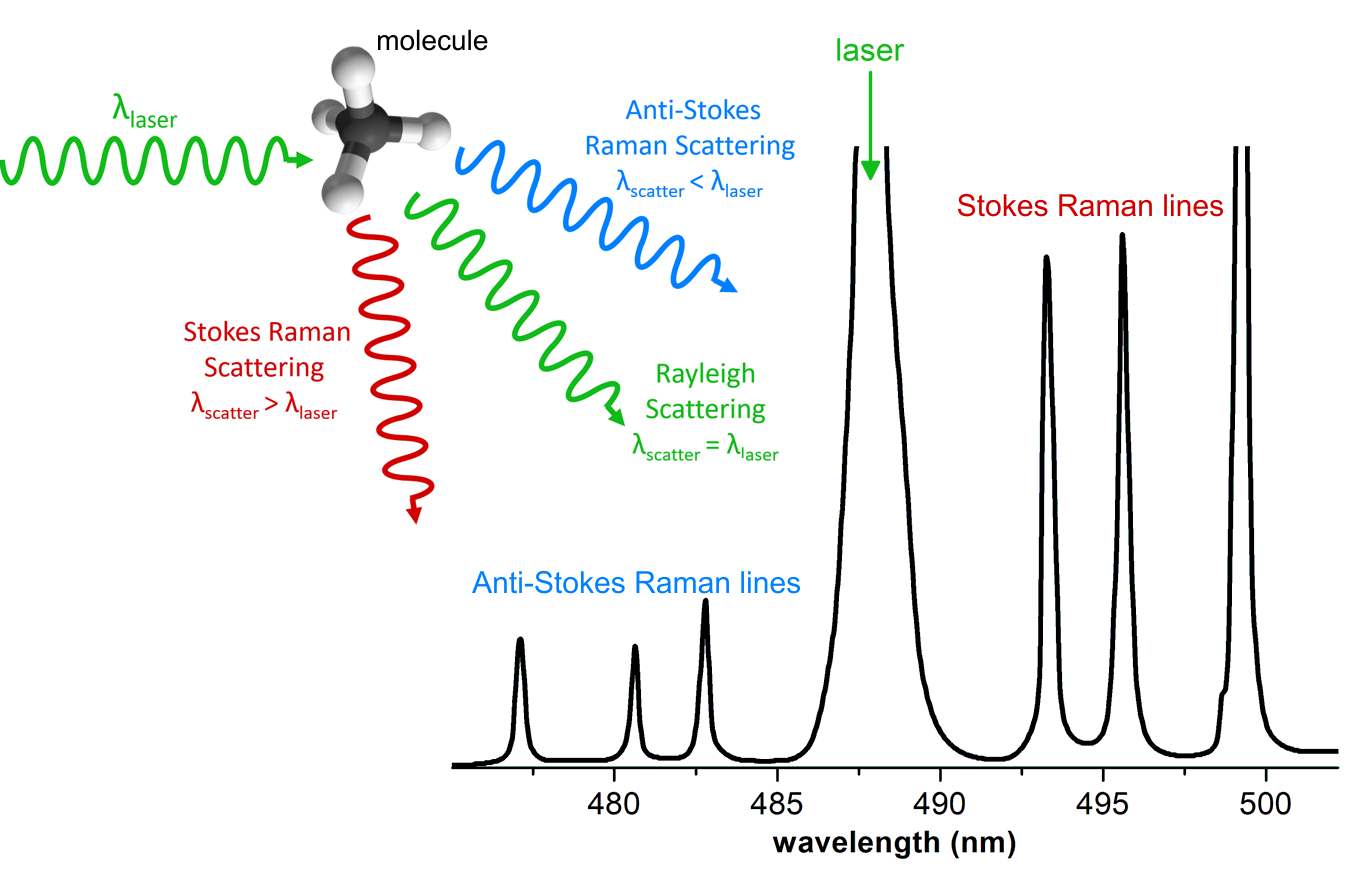
</div>

<!-- Η πειραματική διάταξη είναι σχετικά απλή: συνήθως, ένα δείγμα κάποιου υλικού φωτίζεται με μία δέσμη laser. Η ηλεκτρομαγνητική ακτινοβολία από το φωτισμένο σημείο συλλέγεται με τη βοήθεια ενός φακού και επανακατευθύνεται μέσω ενός μονοχρωμάτορα. Η ελαστικά σκεδαζόμενη ακτινοβολία στο μήκος κύματος που αντιστοιχεί στο μήκος κύματος του laser (σκέδαση Rayleigh) φιλτράρεται είτε από ένα φίλτρο εγκοπής, είτε από ένα φίλτρο διέλευσης ζώνης, ενώ το υπόλοιπο φως που συλλέγεται (σκέδαση Raman) κατευθύνεται προς έναν ανιχνευτή.
 -->
 
Για να πραγματοποιηθεί η μελέτη ενός υλικού με φασματοσκοπία Raman χρειάζεται ο απαραίτητος εξοπλισμός. Τα κύρια μέρη μίας τέτοιας πειραματικής διάταξης είναι:

1. Μία πηγή μονοχρωματικής και παράλληλης δέσμης φωτός (laser). Πριν την τεχνολογική ανάπτυξη των lasers, χρησιμοποιούνταν φασματικές λυχνίες υψηλής ισχύος για την παραγωγή της διεγείρουσας ακτινοβολίας. Συγκεκριμένα, αξιοποιούνταν οι διακριτές φασματικές γραμμές εκπομπής κάποιου αερίου (πχ. υδράργυρος). Αρχικά, ως δείγματα μελέτης της φασματοσκοπίας Raman επιλεγόταν κυρίως διαφανή δείγματα λόγω του μεγάλου βάθος διείσδυσης της ακτινοβολίας σε αυτά. Ωστόσο, με τη ανάπτυξη των ισχυρών πηγών laser άρχισαν να μελετώνται και αδιαφανή υλικά.


2.	Ένα σύστημα καθοδήγησης και συγκέντρωσης της δέσμης της διεγείρουσας ακτινοβολίας στο δείγμα. Συνήθως αυτό το σύστημα αποτελείται από μία διάταξη φακών και φίλτρων που ανακατευθύνουν τη δέσμη, μεταβάλλουν την ισχύ της ή/και το εύρος της.


3.	Ένα φασματόμετρο για την φασματική ανάλυση της σκεδαζόμενης ακτινοβολίας από το μελετούμενο δείγμα. Η συσκευή αυτή πρέπει να έχει τέτοια διακριτική ικανότητα ώστε να διαχωρίζεται η ανελαστικώς σκεδαζόμενη ακτινοβολία (Raman) από την ελαστικώς σκεδαζόμενη ακτινοβολία (Rayleigh) λαμβάνοντας υπόψη γεγονός πως οι γραμμές Raman είναι περισσότερο από 1000 φορές ασθενέστερες από τη γραμμή Rayleigh. Τέλος, το φασματόμετρο θα πρέπει να διαθέτει λειτουργία απόρριψης της παρασιτικής ακτινοβολίας, η οποία εμφανίζεται λόγω ατελειών της διάταξης αλλά και του περιβάλλοντος, όπως η σκέδαση της ακτινοβολίας από τα σωματίδια του αέρα ή/και στα τοιχώματα του φασματόμετρου.


4.	Ένα ανιχνευτής του σκεδαζόμενου φωτός που διαθέτει ιδιαίτερα υψηλή ευαισθησία. Συνήθης συσκευή είναι ένας φωτοπολλαπλασιαστής ή μία συσκευή συζευγμένου φορτίου (CCD).


### Τυπικά φάσματα Raman και πηγές θορύβου

Ένα τυπικό φάσμα Raman διαθέτει έναν αριθμό κορυφών, που δείχνουν την ένταση και τη θέση του μήκους κύματος του σκεδαζόμενου φωτός. Κάθε κορυφή αντιστοιχεί σε μια συγκεκριμένη δόνηση μοριακού δεσμού, συμπεριλαμβανομένων μεμονωμένων δεσμών όπως C-C, C=C, N-O, C-H κ.λπ., αλλά και σύνθετες ομάδες δεσμών όπως δονήσεις αλυσίδας πολυμερούς κ.λπ.


<div>
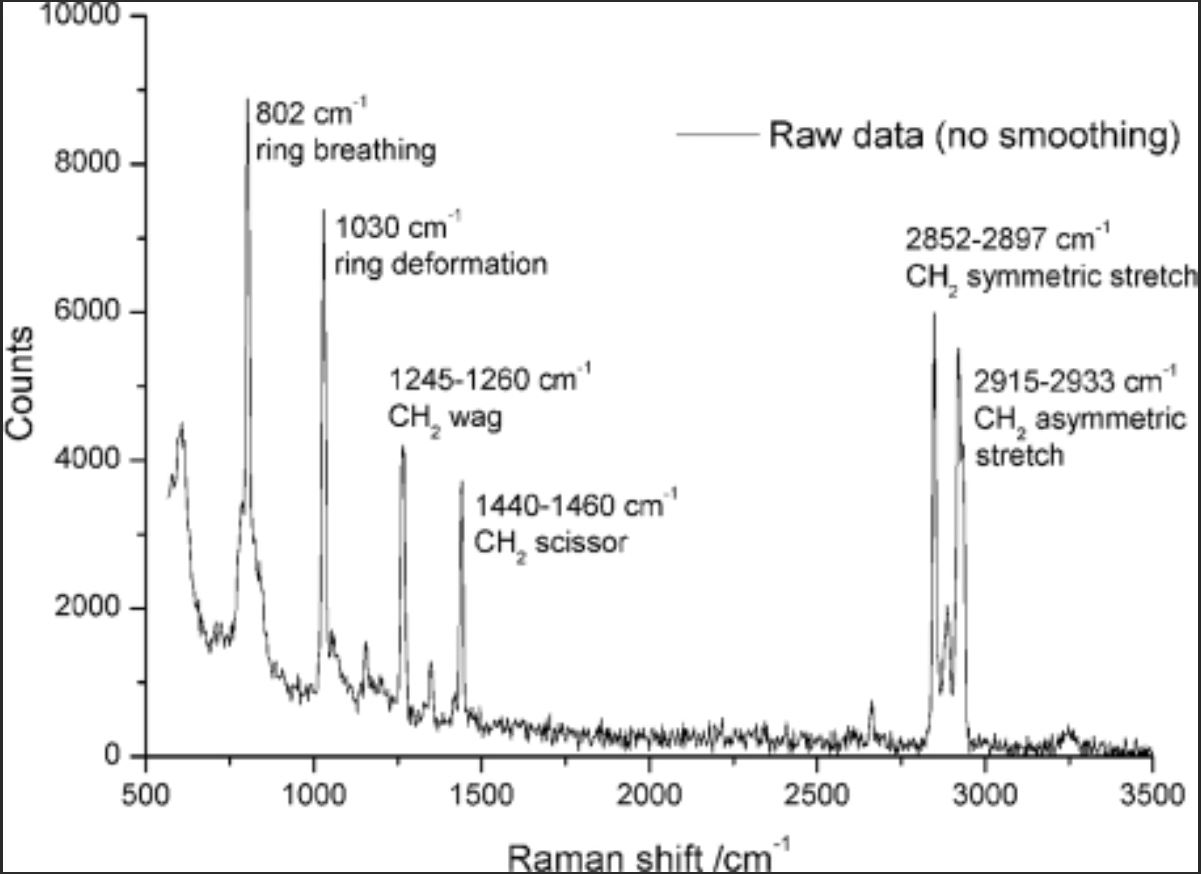
</div>


Γενικά, το προφίλ με τα χαρακτηριστικά ενός φάσματος (θέση και σχετική ένταση κορυφής) παρέχει ένα μοναδικό χημικό "δακτυλικό αποτύπωμα" που μπορεί να χρησιμοποιηθεί για την αναγνώριση ενός υλικού και τον διαχωρισμό του από όλα τα άλλα.

Το φάσμα Raman από ένα υλικό θα περιέχει πληροφορίες για όλα τα μόρια που βρίσκονται εντός του δείγματος. Έτσι, εάν υπάρχει ένα μείγμα μορίων, το φάσμα Raman θα περιέχει κορυφές σε συγκεκριμένα μήκη κύματος που είναι χαρακτηριστικά όλων των διαφορετικών μορίων.

<!-- Εάν τα συστατικά είναι γνωστά, οι μέγιστες εντάσεις μπορούν να χρησιμοποιηθούν για τη δημιουργία ποσοτικών πληροφοριών σχετικά με τη σύνθεση του μείγματος. Με άλλα λόγια, η ένταση των κορυφών ενός φάσματος είναι ευθέως ανάλογη με τη συγκέντρωση του μορίου ή ενώσεων που οι τρόποι δόνησής τους έδωσαν αυτές τις κορυφές. -->

Όπως γίνεται αντιληπτό, ένα φάσμα Raman (ιδιαίτερα ένα φάσμα που προέρχεται από κάποιο μείγμα υλικών), μπορεί να είναι ιδιαιτέρως πολύπλοκο να αναλυθεί. Επιπρόσθετα, υπό πραγματικές πειραματικές συνθήκες, υπάρχουν διάφορες πηγές θορύβου. Αυτές οι πηγές μπορεί να σχετίζονται με το υλικό (sample-dependent artifacts), την πειραματική διάταξη και άλλους εξωγενείς παράγοντες όπως η κοσμική ακτινοβολία (non-sample-depentent artifacts). Αυτό έχει ως αποτέλεσμα τα φάσματα που λαμβάνουμε σε κάποιο πείραμα να είναι επιμολυσμένα με δομές πέραν των χαρακτηριστικών του υλικού. Γι' αυτό τον λόγο, πριν την ανάλυση και την εξαγωγή συμπερασμάτων, είναι απαραίτητη η κατάλληλη προ-επεξεργασία του φάσματος με την αναγνώριση και την αφαίρεση αυτών των πηγών θορύβου.

### Τρόποι αντιμετώπισης του θορύβου

#### Αφαίρεση ακίδων κοσμικής ακτινοβολίας (despiking)
Σε αντίθεση με άλλες πηγές θορύβου, η παρουσία ακίδων κοσμικής ακτινοβολίας στα φασματοσκοπικά δεδομένα δεν εξαρτάται από το δείγμα του υλικού, το laser ή το φασματογράφο. Όταν σωματίδια υψηλής ενέργειας χτυπούν τον ανιχνευτή (κάμερα CCD) δημιουργούνται ηλεκτρόνια λόγω του φωτοηλεκτρικού φαινομένου τα οποία καταγράφονται μαζί με τα ηλεκτρόνια που προκλήθηκαν από την ενέργεια των σκεδαζόμενων φωτονίων Raman. Αυτό έχει ως αποτέλεσμα να εμφανίζονται σε τυχαίες θέσεις στα δεδομένα (δεν αντιστοιχούν δηλαδή σε κάποιο συγκεκριμένο μήκος κύματος) κάποιες "ακίδες" που έχουν χαρακτηριστικά πολύ υψηλή ένταση και πολύ μικρό πλάτος.

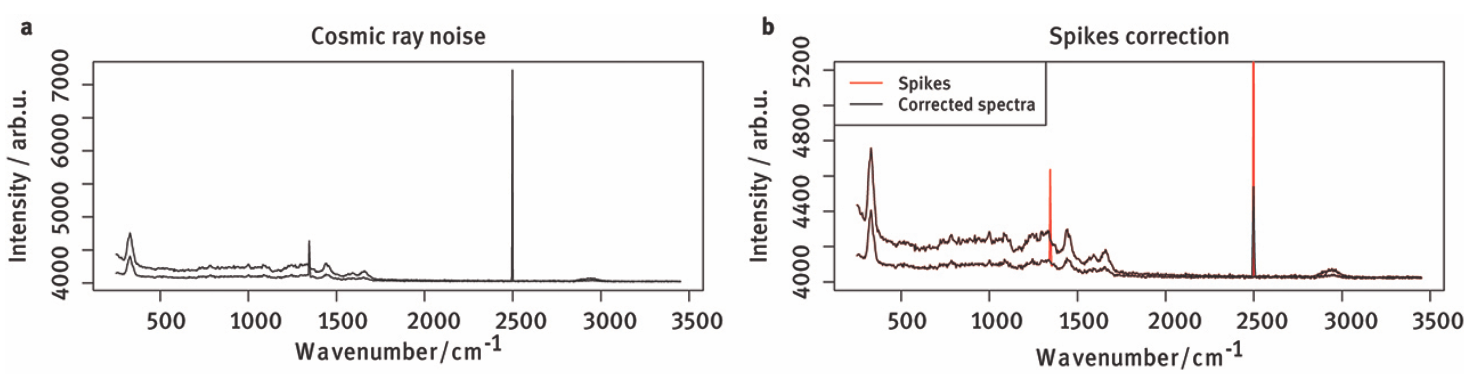

Για την αντιμετώπιση αυτού του προβλήματος χρειαζόμαστε δύο πράγματα:

1. Μία μέθοδο για την αναγνώριση αυτών των κοσμικών ακίδων μέσα στα δεδομένα μας που αποτελούν το πραγματικό φάσμα.

2. Μία μέθοδο αφαίρεσης αυτών των δομών και αντικατάστασής τους με κάποια κατάλληλη τιμή.

Για την αναγνώριση των ακίδων ανάμεσα στα φασματοσκοπικά δεδομένα μπορεί κανείς να χρησιμοποιήσει ως μετρική την **τροποποιημένη z-βαθμολογία** (modified z-score) την οποία θα ορίσουμε ως:

$$Z_t = \frac{0.6745 \times (\nabla Y_t - M)}{\text{MAD}},$$
όπου
- $\nabla Y_t$ είναι η διακριτή διαφορά $\nabla Y_t = Y_t - Y_{t-1},\,\,(t = 2, \dots, n)$. 
- $M$ είναι η διάμεσος (median) αυτής της διαφοράς $\nabla Y_t$: $M = $ median($\nabla Y_t$).
- MAD είναι η διάμεσος (median) της διαφοράς $|\nabla Y_t - M|$: MAD $=$ median($|\nabla Y_t - M|$)

Η λογική είναι ότι για κάθε σημείο των δεδομένων μας μπορούμε να του αποδώσουμε ένα z-score. Αν η βαθμολογία κάποιου σημείου ξεπερνάει ένα όριο $\tau$ που έχουμε θέσει εμείς $(|Z_t| > \tau)$, τότε αυτό το σημείο των δεδομένων μας μαρκάρεται ως σημείο που συνεισφέρει στην δημιουργία μιας ακίδας.


Έχοντας μαρκάρει όλα τα φασματικά μας δεδομένα κατά αυτόν τον τρόπο έχουμε καταφέρει να εντοπίσουμε τα προβληματικά σημεία τα οποία δημιουργούν τις ακίδες. Τώρα πρέπει να τα αφαιρέσουμε και να αντικαταστήσουμε το κενό που δημιουργήθηκε με κάποια κατάλληλη τιμή. Αυτή η τιμή προκύπτει από τον υπολογισμό της μέσης τιμής των γειτονικών στο προβληματικό σημείο τιμών. Συγκεκριμένα, η παρεμβαλόμενη τιμή (interpolated value, $\tilde{Y}_t$) θα είναι:

$$\tilde{Y}_t = \frac{1}{w}\sum_{t-m}^{t+m} Y_t \times \mathbb{I}(Z_t < \tau)$$
όπου για την συνάρτηση $\mathbb{I}(u)$ ισχύει:

\begin{equation}
    \mathbb{I}(u)=
    \begin{cases}
        1, & \text{if } u\,\,\text{is true}\\
        0, & \text{if }u\,\,\text{is false}
    \end{cases}
\end{equation}
και $$w = \sum_{t-m}^{t+m} \mathbb{I}(Z_t < \tau)$$

Περισσότερες και πιο αναλυτικές πληροφορίες σχετικά με την αφαίρεση των ακίδων από κοσμική ακτινοβολία σε φάσματα Raman μπορείτε να βρείτε στην εργασία των Whitaker και Hayes: [Despiking algorithm with modified z-scores, Whitaker et al., Chemometrics and Intelligent Laboratory Systems Vol 179, 15 August 2018.](https://chemrxiv.org/engage/api-gateway/chemrxiv/assets/orp/resource/item/60c73e33469df41c2af4281c/original/a-simple-algorithm-for-despiking-raman-spectra.pdf).

#### Διόρθωση υποβάθρου (background correction)

Υπάρχουν δύο διαφορετικοί τύποι διαδικασιών αφαίρεσης του υποβάθρου στη φασματοσκοπία Raman: 

1. αφαίρεση από το φάσμα του σήματος που παίρνουμε με κλειστό κλείστρο


2. αφαίρεση της μαθηματικά εκτιμώμενης γραμμής βάσης (ή γραμμής υποβάθρου, baseline).

Η δεύτερη μέθοδος αναφέρεται ως διόρθωση γραμμής βάσης (baseline correction). Η διόρθωση της γραμμής υποβάθρου είναι μεγάλης σημασίας για την τυποποίηση των φασματικών δεδομένων όταν τα δείγματα βρίσκονται σε φθορίζον περιβάλλον.

Η εκτίμηση του φθορίζοντος υποβάθρου μαθηματικά βασίζεται στο γεγονός ότι το σήμα φθορισμού είναι ευρύτερο από τις φασματικές ζώνες Raman. Με βάση αυτή την ιδιότητα, αναπτύχθηκε μια ποικιλία αλγορίθμων για την διόρθωση γραμμής υποβάθρου (π.χ. modified polynomial fitting, ALS, SNIP κ.τλ.)<br><br>


<div>
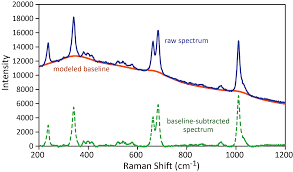
</div>


Περισσότερες και πιο αναλυτικές πληροφορίες σχετικά με την διόρθωση υποβάθρου χρησιμοποιώντας την τεχνική ALS μπορείτε να βρείτε στην εργασία των Paul H. C. Eilers και Hans F.M. Boelens: [Baseline Correction with Asymmetric Least Squares Smoothing](https://www.researchgate.net/publication/228961729_Baseline_Correction_with_Asymmetric_Least_Squares_Smoothing).

#### Εξομάλυνση δεδομένων (data smoothing)

Η εξομάλυνση δεδομένων είναι ένα πολύ συνηθισμένο στάδιο προεπεξεργασίας φασματικών δεδομένων. Η εξομάλυνση αναφέρεται στις αριθμητικές λειτουργίες που εκτελούνται σε πρωτογενή δεδομένα (raw data) προκειμένου να μειωθεί ο (τυχαίος) θόρυβος. Αυτό είναι ιδιαίτερα σημαντικό όταν στοχεύουμε στην απομόνωση σημαντικών φασματικών χαρακτηριστικών που μπορεί να καλύπτονται εν μέρει από την παρουσία θορύβου.

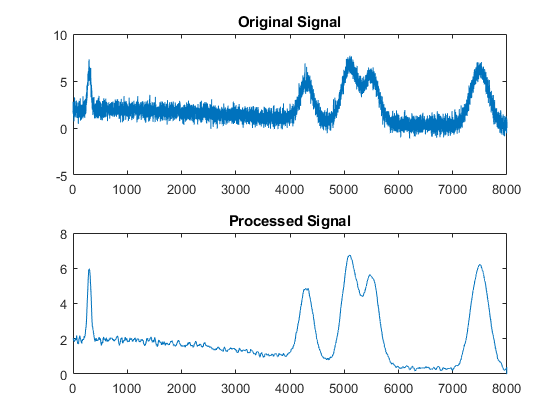

Σε αντίθεση με τις ακίδες που προκαλούν οι κοσμικές ακτίνες, ο τυχαίος θόρυβος σε ένα φάσμα Raman μπορεί να είναι πρόσθετος ή να εξαρτάται από την ένταση. Ο πρόσθετος θόρυβος ακολουθεί την κατανομή Gauss και δεν εξαρτάται από την ένταση του σήματος. Οφείλεται κυρίως στο ρεύμα σκότους (dark current) και τον θόρυβο που εισάγει ο ανιχνευτής κατά την ανάγνωση του σήματος. Από την άλλη πλευρά, ο θόρυβος που εξαρτάται από την ένταση αυξάνεται με την αύξηση της έντασης του σήματος και ακολουθεί την κατανομή Poisson. Για αυτόν τον λόγο, προκειμένου να μειώσουμε αυτόν τον εξαρτώμενο από την ένταση θόρυβο, είναι σημαντικό να σχεδιάσουμε το πείραμα με τέτοιον τρόπο ώστε να διασφαλίζεται η χαμηλή ένταση φθορισμού που μπορεί να υπάρχει στον χώρο διεξαγωγής του πειράματος.

Αν και η προσεκτική επιλογή των συνθηκών κατά την διάρκεια της μέτρησης μπορεί να ελαχιστοποιήσει τον θόρυβο, πρακτικά είναι αδύνατον να μπορέσουμε να μετρήσουμε ένα φάσμα εντελώς απαλλαγμένο από θόρυβο. Ο θόρυβος στα μετρούμενα φάσματα μπορεί να επηρεάσει τη διόρθωση του υποβάθρου όπως είδαμε παραπάνω, την κανονικοποίηση και την ανίχνευση των θέσεων των κορυφών του φάσματος. Για να μειωθεί ο θόρυβος και να γίνει ευκολότερη η ερμηνεία των φασμάτων, μπορεί να εφαρμοστεί μία φασματική εξομάλυνση.

Κάποιες από τις πιο γνωστές τεχνικές εξομάλυνσης είναι η χρήση φίλτρων όπως τα Savitzky-Golay, mean, Gaussian και median με κάθε ένα από αυτά να έχει τις δικές του ιδιαιτερότητες. Για παράδειγμα, η εξομάλυνση των δεδομένων με χρήση του φίλτρου Savitzky-Golay, η οποία βασίζεται στην προσαρμογή ελάχιστων τετραγώνων, είναι η πιο αποτελεσματική όσον αφορά την προστασία των κορυφών του φάσματος. Από την άλλη πλευρά, τα φίλτρα mean και Gaussian επιτρέπουν την αποτελεσματική αφαίρεση του θορύβου ενώ το φίλτρο median επιτρέπει την αφαίρεση των ακραίων τιμών από το φάσμα.

Αν και οποιοδήποτε φιλτράρισμα των δεδομένων μπορεί να αφαιρέσει μέρη χρήσιμων φασματικών πληροφοριών μαζί με το θόρυβο, η καταστροφή των φασμάτων μπορεί να αποφευχθεί εντελώς, εάν το μέγεθος του συνόλου δεδομένων είναι αρκετά μεγάλο.

----

## Προ-επεξεργασία και ανάλυση δεδομένων

### 1. Διάβασμα και καθαρισμός δεδομένων

#### Ζητούμενα

1. <mark> ***Διαβάστε και διερευνήστε τα δεδομένα με την μέθοδο της επιλογής σας.*** Τι παρατηρείτε;</mark>


2. <mark> ***Διαχειριστείτε τις προβληματικές εγγραφές (αν υπάρχουν) με κατάλληλο τρόπο δικαιολογόντας το σκεπτικό σας.***</mark>


Αρχικά θα εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε για να διαβάσουμε, να επεξεργαστούμε και να οπτικοποιήσουμε τα δεδομένα.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['default', 'science']) # choose your own style if you wish 

In [2]:
# Read in data and dispaly columns
data = pd.read_csv('raman_spectrum.csv')
data.columns

Index(['Wavelength (nm)', 'Intensity (arb. unit)'], dtype='object')

In [3]:
# Change column names to something more covenient
data.rename({data.columns[0]:'wavelengths', data.columns[1]:'intensity'}, axis='columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wavelengths  1019 non-null   object
 1   intensity    1013 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


Παρατηρώντας τον συνοπτικό πίνακα που μας δίνει πληροφορίες για τα δεδομένα μας, βλέπουμε ότι:

- Συνολικά τα δεδομένα μας αποτελούνται από δύο στήλες. Η πρώτη στήλη αφορά το εύρος των μηκών κύματος (σε nm) για το οποίο έχουμε το φάσμα, ενώ η δεύτερη αφορά την ένταση της ακτινοβολίας (σε αυθαίρετες μονάδες).


- Κάποιες στήλες περιέχουν κενές εγγραφές, ενώ το γεγονός ότι ο τύπος των δεδομένων σε μερικές στήλες έχει χαρακτηριστεί από το pandas ως ``object`` σημαίνει ότι μάλλον οι συγκεκριμένες στήλες περιέχουν κάποια εγγραφή (συμβολοσειρά ή άλλο αντικείμενο) που δεν επέτρεψε την μετατροπή τους σε αριθμητικά δεδομένα.

In [4]:
data.isna().sum()

wavelengths     5
intensity      11
dtype: int64

Έχοντας εντοπίσει τα προβλήματα με τα δεδομένα μας, θα προσπαθήσουμε να τα επιλύσουμε μετατρέποντας τις εγγραφές μας σε αριθμητικές (όπου αυτό είναι δυνατό) ή σε κενές εγγραφές όταν η μετατροπή σε αριθμητικό τύπο δεν είναι εφικτή. Ο λόγος είναι ότι με την βιβλιοθήκη ``pandas`` είναι πολύ εύκολο να διαχειριστούμε κενές εγγραφές στο σύνολο των δεδομένων μας.

Κάνοντας ένα γρήγορο γράφημα των δεδομένων μας φαίνεται ξεκάθαρα το πρόβλημα με τις κενές εγγραφές. Γι' αυτό τον λόγο θα πρέπει να διαχειριστούμε με κατάλληλο τρόπο αυτές τις προβληματικές τιμές.

In [5]:
for col in data.columns:
    # Convert all data to numeric. If invalid parsing set value to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce') 

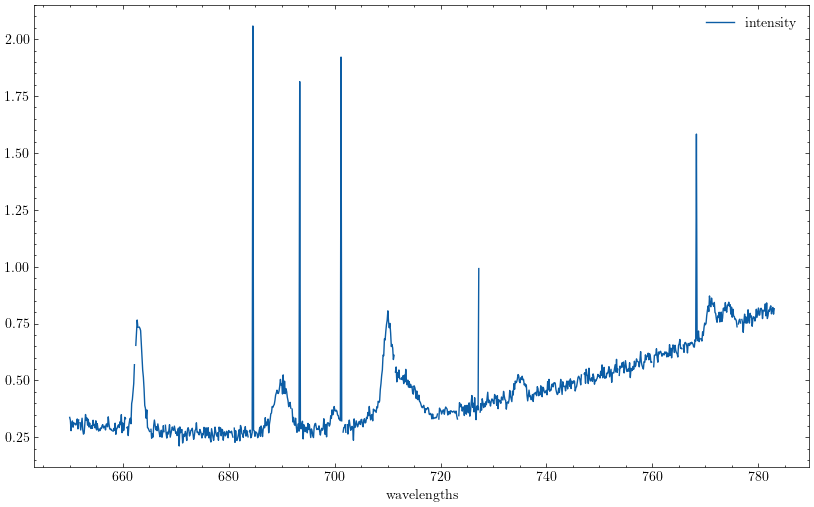

In [6]:
# Use plotting options from pandas for a quick exploratory analysis of the data
# you can use matplotlib as well
_ = data.plot('wavelengths', figsize=(10,6))

Αντί να διαγράψουμε από το σύνολο των δεδομένων μας τις κενές εγγραφές (και να χάσουμε πολύτιμα δεδομένα), θα τις αντικαταστήσουμε με τον μέσο όρο των γειτονικών τους κελιών. Η επιλογή αυτή έχει νόημα καθώς η τιμή που παρεμβάλουμε με αυτόν τον τρόπο ακολουθεί την τοπική τάση του φάσματος.

In [7]:
for col in data.columns:
    # Now that each column contains only numeric data
    # fill the missing values
    data[col].where(data[col] == np.nan, 
                    other=(data[col].fillna(method='ffill') + data[col].fillna(method='bfill'))/2., 
                    inplace=True)

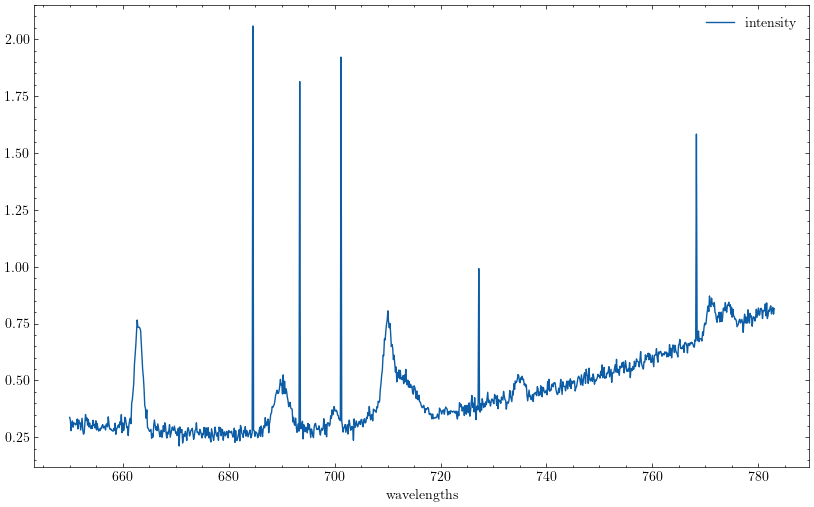

In [8]:
_ = data.plot('wavelengths', figsize=(10,6))
# _ = data.plot.hexbin(x=("wavelengths"), y=("intensity"), gridsize=40, cmap="hot", sharex=False, figsize=(10,6))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wavelengths  1024 non-null   float64
 1   intensity    1024 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


Παρατηρούμε ότι τα δεδομένα μας είναι πλέον όλα αριθμητικού τύπου και δεν περιέχουν κενές εγγραφές. Είμαστε τώρα σε θέση να προχωρήσουμε στην προ-επεξεργασία του φάσματος και την αφαίρεση του θορύβου.

### 2. Προ-επεξεργασία φάσματος

#### Ζητούμενα

Το φάσμα που έχουμε στη διάθεσή μας έχει θόρυβο από διάφορες πηγές (κοσμική ακτινοβολία, υπόβαθρο κτλ). Πριν προχωρήσουμε στην ανάλυσή του πρέπει να αφαιρέσουμε αυτόν τον θόρυβο. Αρχικά θα αφαιρέσουμε τις **ακίδες κοσμικής ακτινοβολίας**. Ο αλγόριθμος για την αφαίρεση των ακίδων παρουσιάζεται συνοπτικά στην θεωρητική εισαγωγή αυτού του σημειωματάριου και πιο αναλυτικά στην εργασία των Whitaker και Hayes

> "A Simple Algorithm for Despiking Raman Spectra", Darren A. Whitaker and Kevin Hayes, Chemometrics and Intelligent Laboratory Systems Vol 179, 15 August 2018.

1. <mark>**Τροποποιήστε την συνάρτηση ``modified_z_score`` (δες παρακάτω κελιά) ώστε να υπολογίζει την τροποποιημένη z-βαθμολογία για κάθε τιμή του φάσματος.** Αυτή η συνάρτηση χρησιμεύει στον εντοπισμό των ακίδων μέσα στο φάσμα. **Hint:** Χρησιμοποιήστε την μέθοδο ``diff()`` της βιβλιοθήκης ``NumPy`` (για την τεκμηρίωση δείτε [εδώ](https://numpy.org/doc/stable/reference/generated/numpy.diff.html)).</mark>

Ο αλγόριθμος για την αφαίρεση των ακίδων σας παρέχεται σε μία συνάρτηση με το όνομα ``despike``. Η συνάρτηση αυτή κάνει χρήση της τροποποιημένης z-βαθμολογίας μέσω της συνάρτησης ``modified_z_score`` που εσείς καλείστε να γράψετε.


2. <mark>**Κάντε χρήση της συνάρτησης ``despike`` ώστε να πάρετε το φάσμα του υλικού έχοντας αφαιρέσει τις ακίδες κοσμικής ακτινοβολίας. Στη συνέχεια κάντε ένα γράφημα όπου να φαίνεται τόσο το αρχικό, όσο και το "καθαρό" από κοσμική ακτινοβολία φάσμα.** Βεβαιωθείτε ότι χρησιμοποιείτε κατάλληλη γραμματοσειρά και μέγεθος για τα ονομάτα των αξόνων, τίτλων και ετικετών στο γράφημα.</mark>

 
Για να προσαρμόσουμε μία **γραμμή υποβάθρου**, θα χρησιμοποιήσουμε έναν αλγόριθμο εκτίμησης του υποβάθρου που βασίζεται στην τεχνική των ελαχίστων τετραγώνων, όπως παρουσιάστηκε στην εργασία του από τους Eilers και Boelens το 2005.

> "Baseline Correction with Asymmetric Least Squares Smoothing", Paul H. C. Eilers and Hans F.M. Boelens. October 21, 2005

Ο αλγόριθμος αυτός σας παρέχεται σε μία συνάρτηση με το όνομα ``baseline_correction``. Όπως αναφέρουν οι συγγραφείς στην εργασία τους, υπάρχουν δύο παράμετροι: p για την ασυμμετρία και l για την ομαλότητα. Οι τιμές των δύο αυτών παραμέτρων πρέπει να βρεθούν μηχανικά (με το χέρι) δοκιμάζοντας την εκτιμώμενη γραμμή υποβάθρου που προκύπτει πάνω στα δεδομένα. Γενικά βρίσκουμε ότι τιμές μεταξύ $0.001 < p < 0.1$ για την ασυμμετρία και $10^2 < l < 10^9$ για την ομαλότητα είναι μία καλή επιλογή (για φάσματα με θετικές κορυφές).

3. <mark>**Δώστε κατάλληλες τιμές για την ασυμμετρία και την ομαλότητα και εφαρμόστε τον αλγόριθμο των ελαχίστων τετραγώνων ώστε να πάρετε μία εκτίμηση για την γραμμή υποβάθρου.** Αντί για τυφλή αναζήτηση τιμών, μπορείτε να φτιάξετε έναν λογαριθμικό χώρο αναζήτησης του κατάλληλου ζευγαριού τιμών εξετάζοντας για κάθε υποψήφιο ζευγάρι τιμών την εκτιμώμενη γραμμή υποβάθρου και πως αυτή προσαρμόζεται πάνω στο φάσμα. Τα μοτίβα που προκύπτουν από μία τέτοια αναζήτηση θα σας βοηθήσουν να βρείτε με μία γρήγορη ματιά την τάξη μεγέθους της κάθε παραμέτρου μειώνοντας σημαντικά το χρόνο που θα ξοδεύατε με μία αναζήτηση στα τυφλά.</mark>


4. <mark>**Αφαιρέστε την εκτιμώμενη γραμμή υποβάθρου από το φάσμα του υλικού.**</mark>


5. <mark>**Κάντε ένα πάνελ 2x1 όπου στο αριστερό μέρος θα υπάρχει ένα γράφημα του φάσματος *μαζί* με την εκτιμώμενη γραμμή υποβάθρου και στα δεξιά ένα γράφημα με το τελικό φάσμα (έχοντας αφαιρέσει δηλαδή την γραμμή υποβάθρου).** Μην ξεχάσετε να συμπεριλάβετε ονόματα για τους άξονες, τίτλους και ετικέτες και βεβαιωθείτε ότι χρησιμοποιείτε κατάλληλη γραμματοσειρά και μέγεθος.</mark> 


Τέλος, για την εξομάλυνση του φάσματος θα χρησιμοποιήσουμε το φίλτρο Savitzky-Golay όπως παρέχεται από την βιβλιοθήκη ``SciPy`` (για την τεκμηρίωση δείτε [εδώ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)).

Η ιδέα πίσω από την εξομάλυνση με την μέθοδο Savitzky-Golay είναι αρκετά απλή: για κάθε σημείο δεδομένων στο φάσμα, ο αλγόριθμος θα:

    i. Επιλέξει ένα παράθυρο με κάποιο εύρος (π.χ. πέντε σημεία) γύρω από αυτό το σημείο
    
    ii. Θα προσαρμόσει ένα πολυώνυμο κάποιου βαθμού στα σημεία που βρίσκονται εντός του επιλεγμένου παραθύρου
    
    iii. Θα αντικαταστήσει τα εν λογω σημεία δεδομένων με την αντίστοιχη τιμή που προκύπτει από το προσαρμοσμένο πολυώνυμο

Εσείς, ως χρήστες, θα πρέπει να ορίσετε δύο παραμέτρους για να μπορέσετε να χρησιμοποιήσετε το φίλτρο στα δεδομένα σας: το πλάτος του παραθύρου και ο βαθμός του πολυωνύμου που θα προσαρμοστεί στα δεδομένα.

<span style="background-color: #FFFF00">Προσοχή όμως:</span> Πρέπει να υπάρχει μία σχετική "ισορροπία" στην επιλογή τιμών για τις δύο αυτές παραμέτρους. Αν επιτρέψουμε ένα πολύ μεγάλο πλάτος για το παράθυρο κινδυνεύουμε να χάσουμε χρήσιμα χαρακτηριστικά του φάσματος (π.χ. κορυφές). Αν δώσουμε πολύ μεγάλο βαθμό στο πολυώνυμο που θα προσαρμοστεί τότε υπάρχει κίνδυνος να αρχίσει να προσαρμόζεται και στον θόρυβο του φάσματος. Θα πρέπει λοιπόν, σε αυτήν την περίπτωση, να αυξήσουμε ταυτόχρονα και το πλάτος του παραθύρου προσέχοντας βέβαια μην πέσουμε στην παγίδα που αναφέραμε πριν.

Για καλύτερη επεξήγηση της αρχής λειτουργίας του συγκεκριμένου αλγορίθμου, την επιλογή των παραμέτρων αλλά και των κινδύνων αυτών δείτε [εδώ](https://nirpyresearch.com/savitzky-golay-smoothing-method/).


6. <mark>***Εφαρμόστε το φίλτρο Savitzky-Golay στα δεδομένα από τα οποία έχετε ήδη αφαιρέσει την γραμμή υποβάθρου επιλέγοντας κατάλληλες τιμές για το πλάτος του παραθύρου και τον βαθμό του πολυωνύμου. Στη συνέχεια κάντε ένα γράφημα όπου θα φαίνεται το εξομαλυμένο φάσμα συγκριτικά με το φάσμα πριν την εξομάλυνση.*** Αν όλα πήγαν καλά θα πρέπει να δείτε ότι το εξομαλυμένο φάσμα διατηρεί όλα τα κύρια χαρακτηριστικά του, αλλά περιέχει πλέον λιγότερο τυχαίο θόρυβο (μικρότερες ταλαντώσεις) σε σύγκριση με πριν. Αυτό είναι και το τελικό φάσμα το όποιο μπορεί να χρησιμοποιηθεί αργότερα για περαιτέρω ανάλυση. Μπορείτε, εάν το επιθυμείτε, να προσθέσετε το επεξεργασμένο φάσμα ως μία καινούργια στήλη στο αρχικό DataFrame με τα πρωτογενή δεδομένα.</mark>

### 2.1 Αφαίρεση ακίδων κοσμικής ακτινοβολίας

In [10]:
def modified_z_score(y):
    """
        Arguments
        =========
        y : array-like, spectrum intensity
        
        Return
        ======
        modified_z_scores : array-like, modified z-score for
                            every data point in y
    """
    # Differentiated intensity values
    detrended = np.diff(y) 
    
    # Median of the differentiated intensity values
    detrended_median = np.median(detrended) 
    
    # median absolute deviation of the differentiated intensity values
    mad = np.median(np.abs(detrended - detrended_median)) 
    
    modified_z_scores = 0.6745 * (detrended - detrended_median) / mad
    return modified_z_scores




def despike(y, m=5, threshold=6, inplace=False):
    """
        Arguments
        =========
        y         : array-like, spectrum intensity
        m         : int, width of moving window 
        threshold : int, wavelengths with modified z-score above this value
                    are flagged as cosmic spikes
        inplace   : bool, if True it will overwrite the provided spectrum intensity
        
        Return
        ======
        y_interpolated : array-like, spectrum intensity with spikes removed and
                         replaced with the interpolated average intensity value 
                         determined by the neighborhood (window) width 
    """
    if inplace:
        y_interpolated = y
    else:
        y_interpolated = y.copy() # Keep original spectrum
        
    is_spike = np.abs(np.array(modified_z_score(y))) > threshold # mask spikes
    for i in np.arange(len(y)-1):
        if is_spike[i] == True:
            try:
                if (i-m < 0):  # spike appearing in firsts wavelengths
                    window_idx = np.arange(i+m, i+2*m+1)
                else:
                    window_idx = np.arange(i-m, i+m+1)
                    
                I = is_spike[window_idx] == False  # indicator function
                window_idx = window_idx[I]  # keep indeces with no spikes
                y_interpolated[i] = np.mean(y[window_idx])

            except IndexError: # spike appearing in last wavelengths
                if (i == len(y)-2): 
                    y_interpolated[-1] = y[i-1]  # backward fill
                else:
                    window_idx = np.arange((i-m*2), i-m)
                    I = is_spike[window_idx] == False  # indicator function
                    window_idx = window_idx[I]  # keep indeces with no spikes
                    y_interpolated[i] = np.mean(y[window_idx])

    return y_interpolated

Κάνοντας χρήση του αλγορίθμου που μας παρέχεται στην συνάρτηση ``despike`` παίρνουμε το φάσμα μας χωρίς τις ακίδες κοσμικής ακτινοβολίας. Η δράση των δύο αλγορίθμων (αναγνώριση και αφαίρεση ακίδων) φαίνεται ξεκάθαρα αν βάλουμε στο ίδιο γράφημα το αρχικό μας φάσμα με αυτό που προκύπτει μετά την εφαρμογή των αλγορίθμων.

In [11]:
despiked_spectrum = despike(data["intensity"])

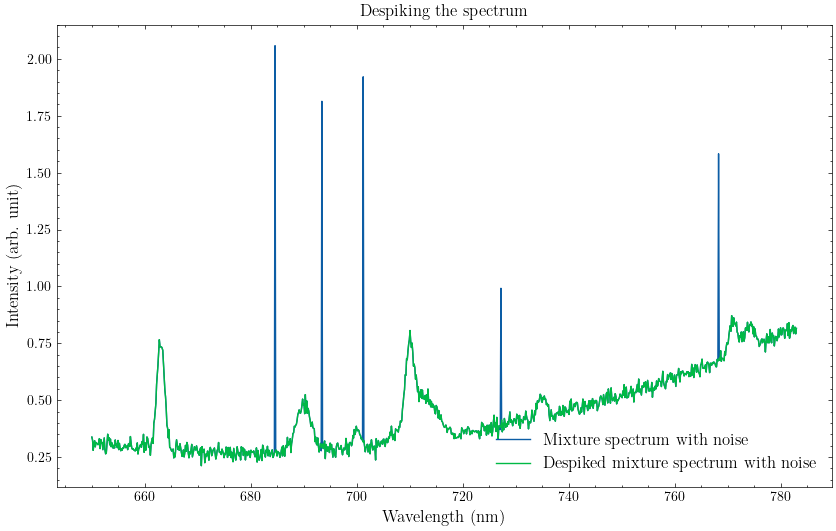

In [12]:
plt.figure(figsize=(10,6))

plt.plot(data["wavelengths"], data["intensity"], label='Mixture spectrum with noise')
plt.plot(data["wavelengths"], despiked_spectrum, label='Despiked mixture spectrum with noise')

plt.title('Despiking the spectrum', fontsize=12)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Intensity (arb. unit)', fontsize=12)

plt.legend(loc="lower right", fontsize=12)
plt.show()

Έχοντας αφαιρέσει τις ακίδες κοσμικής ακτινοβολίας από το φάσμα μας μπορούμε να συνεχίσουμε στο επόμενο στάδιο της προ-επεξεργασίας.

### 2.2 Διόρθωση υποβάθρου

In [13]:
# We need the following packages here:
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [14]:
# Baseline estimation function:
def baseline_correction(y, lam, p, n_iter=100):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(n_iter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

Όπως εξηγήσαμε, πρέπει να "μαντέψουμε" τις παραμέτρους για την ασυμμετρία και την ομαλότητα ώστε να βρούμε ένα κατάλληλο ζεύγος που να προσαρμόζεται ικανοποιητικά καλά πάνω στα συγκεκριμένα δεδομένα. Μπορούμε φυσικά να επιχειρίσουμε να το κάνουμε στα "τυφλά" αλλά ο χώρος στον οποίο αναζητούμε τις κατάλληλες τιμές είναι πολύ μεγάλος για κάτι τέτοιο.

Μία άλλη προσέγγιση είναι να κατασκευάσουμε έναν λογαριθμικό χώρο αναζήτησης αυτών των τιμών και να δούμε πως επηρεάζει η κάθε παράμετρος την εκτίμηση της γραμμής του υποβάθρου. Έτσι, ελπίζουμε να μπορέσουμε να διακρίνουμε κάποια μοτίβα και να προσαρμόσουμε την αναζήτηση των βέλτιστων τιμών πιο εύκολα και γρήγορα.

Παρακάτω δημιουργούμε έναν τέτοιο χώρο αναζήτησης που περιέχει συνολικά, $5 \times 5 = 25$ ζευγάρια τιμών για τις παραμέτρους της ασυμμετρίας και της ομαλότητας. Για κάθε ζευγάρι κάνουμε το γράφημα του φάσματος και πάνω του προσαρμόζουμε την εκτίμηση της γραμμής του υποβάθρου που προκύπτει για το συγκεκριμένο ζευγάρι τιμών.

Testing p = 0.001, l = 100.0


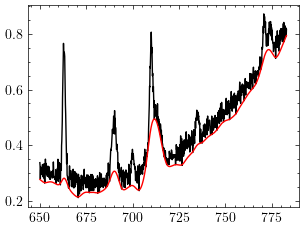

Testing p = 0.001, l = 5623.413251903491


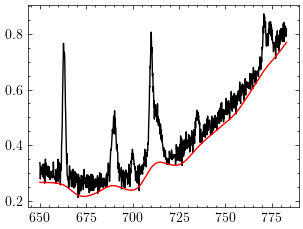

Testing p = 0.001, l = 316227.7660168379


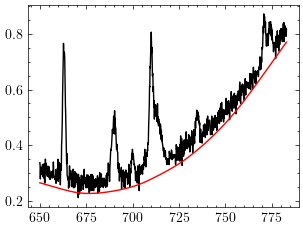

Testing p = 0.001, l = 17782794.100389227


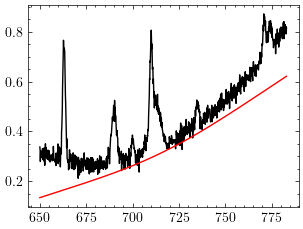

Testing p = 0.001, l = 1000000000.0


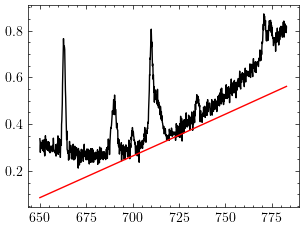

Testing p = 0.0031622776601683794, l = 100.0


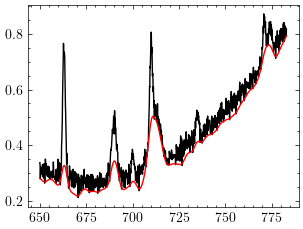

Testing p = 0.0031622776601683794, l = 5623.413251903491


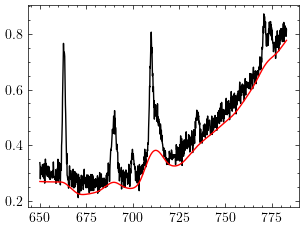

Testing p = 0.0031622776601683794, l = 316227.7660168379


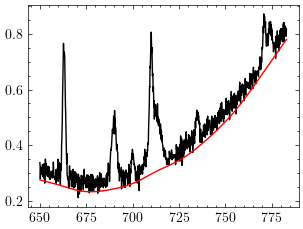

Testing p = 0.0031622776601683794, l = 17782794.100389227


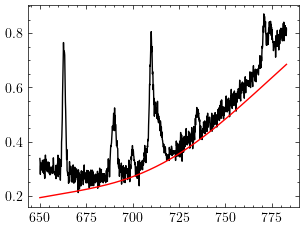

Testing p = 0.0031622776601683794, l = 1000000000.0


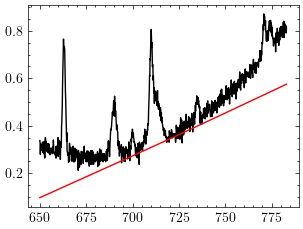

Testing p = 0.01, l = 100.0


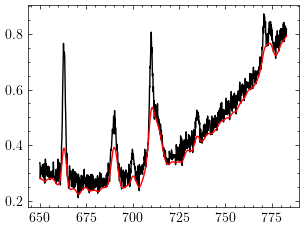

Testing p = 0.01, l = 5623.413251903491


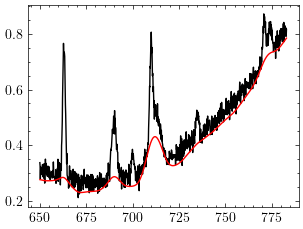

Testing p = 0.01, l = 316227.7660168379


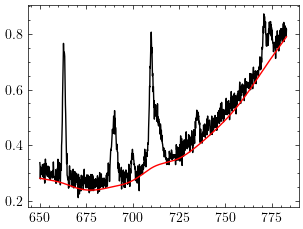

Testing p = 0.01, l = 17782794.100389227


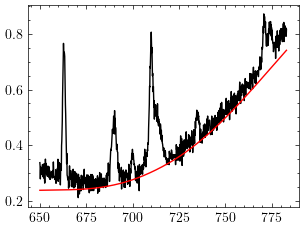

Testing p = 0.01, l = 1000000000.0


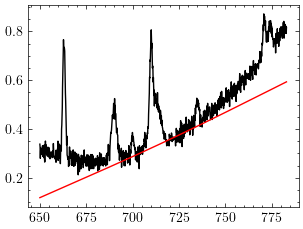

Testing p = 0.03162277660168379, l = 100.0


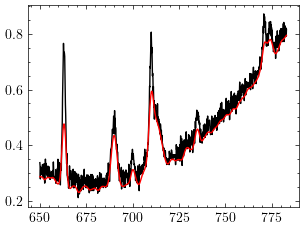

Testing p = 0.03162277660168379, l = 5623.413251903491


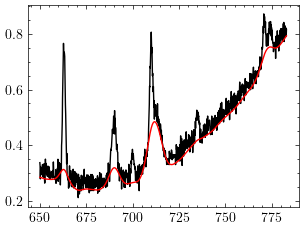

Testing p = 0.03162277660168379, l = 316227.7660168379


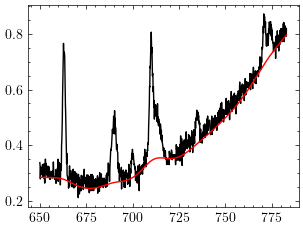

Testing p = 0.03162277660168379, l = 17782794.100389227


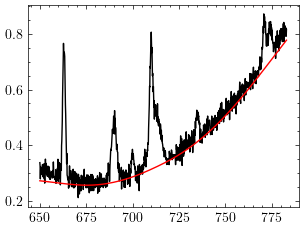

Testing p = 0.03162277660168379, l = 1000000000.0


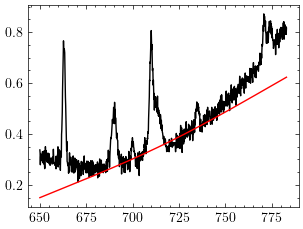

Testing p = 0.1, l = 100.0


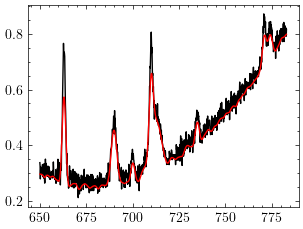

Testing p = 0.1, l = 5623.413251903491


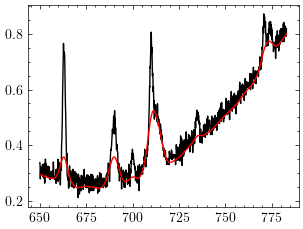

Testing p = 0.1, l = 316227.7660168379


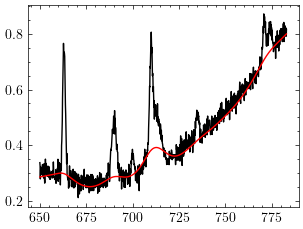

Testing p = 0.1, l = 17782794.100389227


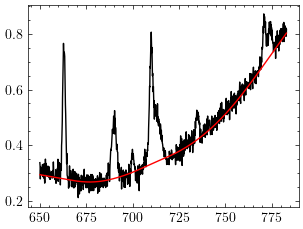

Testing p = 0.1, l = 1000000000.0


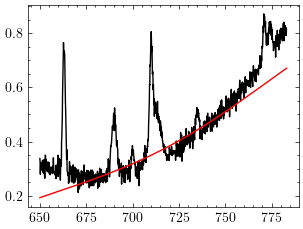

In [15]:
for p in np.logspace(-3, -1, 5):
    for l in np.logspace(2, 9, 5):
        print("Testing p = {}, l = {}".format(p, l))
        estimated_baselined = baseline_correction(despiked_spectrum, l, p)
        baselined_spectrum = despiked_spectrum - estimated_baselined
        plt.plot(data["wavelengths"], despiked_spectrum, color='black', label='Mix spectrum with noise' )
        plt.plot(data["wavelengths"], estimated_baselined, color='red', label='Estimated baseline')
        plt.show()
        # _ = input("Press enter to continue...") # Uncomment this if you want to pause after each figure

Παρατηρούμε ότι τα ζευγάρια τιμών:

1. $p = 0.03\dots,\,l = 17782794.1\dots$


2. $p = 0.1,\,l = 17782794.1\dots$

είναι αρκετά καλοί υποψήφιοι. Με λίγο περισσότερη αναζήτηση γύρω από αυτές τις τιμές καταφέρνουμε να προσδιορίσουμε ένα ικανοποιητικά καλό ζευγάρι τιμών:

In [16]:
# # Parameters for this baseline:
l = 10_782_794 # smoothness
p = 0.05 # asymmetry

Με τη βοήθεια αυτού του αλγορίθμου μπορούμε να υπολογίσουμε τη γραμμή υποβάθρου και να την αφαιρέσουμε από το μετρούμενο φάσμα.

In [17]:
# Estimation of the baseline
estimated_baselined = baseline_correction(despiked_spectrum, l, p)

# Baseline subtraction
baselined_spectrum = despiked_spectrum - estimated_baselined

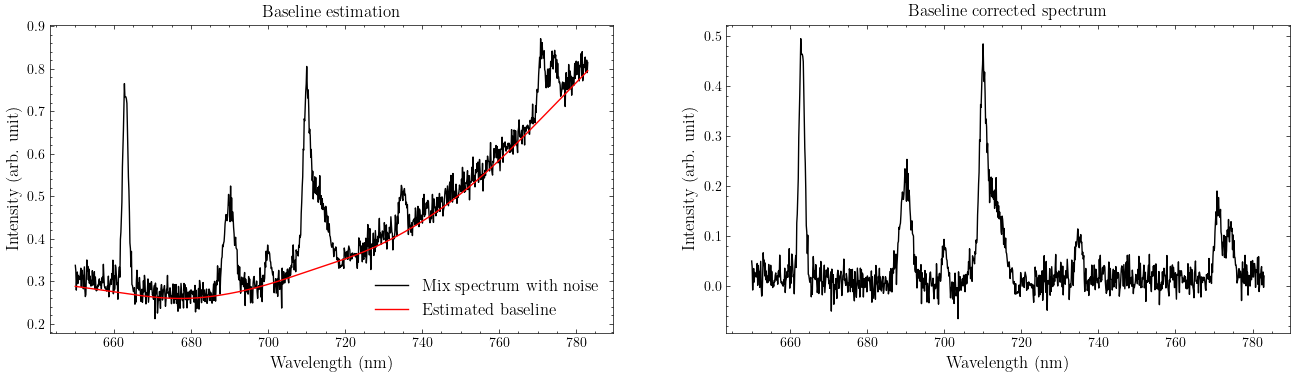

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

# We compared the original mix spectrum and the estimated baseline
ax1.plot(data["wavelengths"], despiked_spectrum, color='black', label='Mix spectrum with noise' )
ax1.plot(data["wavelengths"], estimated_baselined, color='red', label='Estimated baseline')
ax1.set_title('Baseline estimation', fontsize=12)
ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Intensity (arb. unit)', fontsize=12)
ax1.legend(loc="lower right", fontsize=12)

# We plot the mix spectrum after baseline subtraction
ax2.plot(data["wavelengths"], baselined_spectrum, color='black')
ax2.set_title('Baseline corrected spectrum', fontsize=12)
ax2.set_xlabel('Wavelength (nm)', fontsize=12)
ax2.set_ylabel('Intensity (arb. unit)', fontsize=12)
plt.show()

Έχοντας αφαιρέσει τόσο τις ακίδες κοσμικής ακτινοβολίας από το φάσμα μας όσο και τη συνεισφορά του υποβάθρου, μπορούμε να συνεχίσουμε στο τελευταίο στάδιο της προ-επεξεργασίας.

### 2.3 Εξομάλυνση φάσματος

In [19]:
from scipy.signal import savgol_filter

Όπως εξηγήσαμε, η συγκεκριμένη συνάρτηση που μας δίνεται έτοιμη από τη βιβλιοθήκη ``SciPy`` χρειάζεται δύο παραμέτρους: το εύρος του παραθύρου μέσα στο οποίο θα γίνει η προσαρμογή των δεδομένων και τον βαθμό της πολυωνυμικής συνάρτησης που θα προσαρμοστεί.

Μπορείτε να παίξετε με τις δύο αυτές παραμέτρους και να δείτε τι συνέπειες έχουν οι επιλογές σας στην εξομάλυνση του φάσματος.

In [20]:
# Parameters:
w = 9 # window width (number of points)
p = 2 # polynomial order

smoothed_spectrum = savgol_filter(baselined_spectrum, w, polyorder=p, deriv=0)

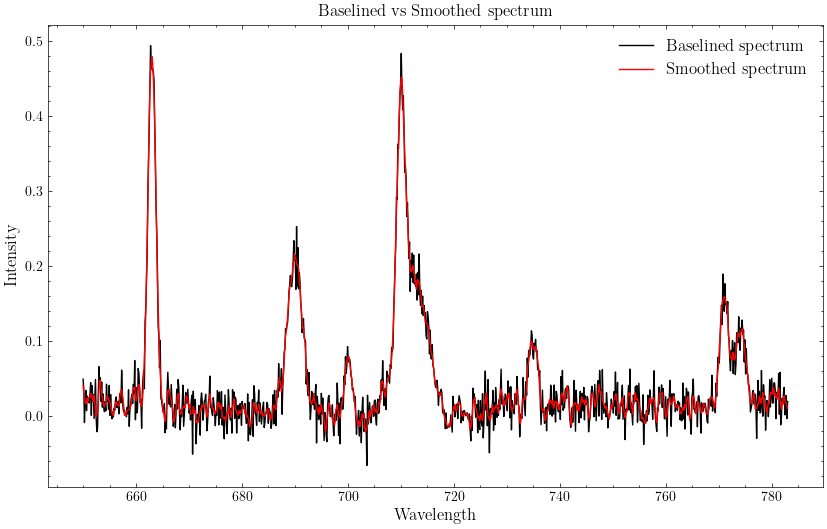

In [21]:
# We plot the mix spectrum after baseline subtraction
plt.figure(figsize=(10,6))

plt.plot(data["wavelengths"], baselined_spectrum, color='black', label='Baselined spectrum' )
plt.plot(data["wavelengths"], smoothed_spectrum, color='red', label='Smoothed spectrum' )
plt.title('Baselined vs Smoothed spectrum', fontsize=12)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Intensity',  fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()

Τέλος, ας προσθέσουμε το τελικό φάσμα που προέκυψε στο DataFrame με τα αρχικά δεδομένα μας και ας συγκρίνουμε τη μορφή του φάσματος πριν την προ-επεξεργασία και μετά.

In [22]:
data.rename({"intensity":"intensity_raw"}, axis=1, inplace=True) # rename column with raw data
data["intensity"] = smoothed_spectrum # add new column with the processed data

data

,wavelengths,intensity_raw,intensity
0,650.000000,0.337532,0.040977
1,650.130010,0.324822,0.031268
2,650.260020,0.279226,0.023872
3,650.390029,0.309586,0.018787
4,650.520039,0.321801,0.016015
...,...,...,...
1019,782.479961,0.792565,0.020915
1020,782.609971,0.811578,0.018995
1021,782.739980,0.820834,0.016646
1022,782.869990,0.791326,0.013868


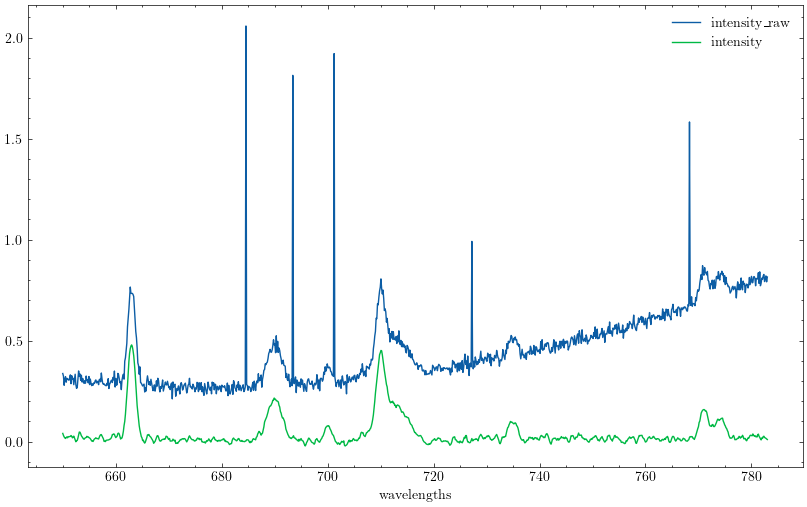

In [23]:
_ = data.plot("wavelengths", figsize=(10,6))

### 3. Ανάλυση φάσματος

#### Ζητούμενα

Έχοντας επεξεργαστεί κατάλληλα το φάσμα μας μπορούμε πλέον να περάσουμε στην ανάλυση. Το πρόβλημα μας είναι το ίδιο που περιγράψαμε στην αρχή: έχουμε ένα σύνθετο φάσμα που αποτελείται από μία μίξη Γκαουσιανών κορυφών αλλά δεν ξέρουμε ούτε πόσα ξεχωριστά φάσματα χρησιμοποιήθηκαν για την σύνθεσή του ούτε σε τι αναλογίες.

1. <mark> **Προσδιορίστε προσεγγιστικά τα όρια κάθε κορυφής στο φάσμα και απομονώστε τις** ώστε κάθε μία να αποτελεί μία ξεχωριστή Γκαουσιανή κατανομή. </mark>


2. <mark> **Προσαρμόστε μία κατάλληλη συνάρτηση στις τρεις πρώτες κορυφές** και βρείτε τους συντελεστές προσαρμογής για την κάθε μία μαζί με το σφάλμα τους. Η παράμετρος που μας ενδιαφέρει να βρούμε μέσω της προσαρμογής ενός μαθηματικού μοντέλου είναι **η τοποθεσία (μήκος κύματος) του μεγίστου κάθε κορυφής**. </mark>


3. <mark> **Φτιάξτε ένα διάγραμμα διασποράς** που δείχνει τα φασματικά σας δεδομένα. **Στο ίδιο γράφημα παρουσιάστε τις προσαρμοσμένες καμπύλες** σε κάθε μία από τις τρεις κορυφές καθώς και μία κάθετη ευθεία που διέρχεται από το μήκος κύματος που προέκυψε από την προσαρμογή. </mark>


Συνήθως, τα φάσματα Raman παρουσιάζονται ως συνάρτηση του κυματάριθμου, $k$, αντί του μήκους κύματος με τα δύο μεγέθη να συνδέονται μέσω της σχέσης $$k = 1 / \lambda$$

Επίσης, το σημείο αναφοράς μπορεί να είναι διαφορετικό για κάθε φάσμα. Αυτό συμβαίνει γιατί **ως σημείο αναφοράς συνήθως χρησιμοποιείται το μήκος κύματος του laser με το οποίο κατάγραφηκε το φάσμα**. Με άλλα λόγια, το μηδέν στον οριζόντιο άξονα των κυματαρίθμων είναι το μήκος κύματος του εκάστοτε laser που χρησιμοποιεί το κάθε εργαστήριο. Το αποτέλεσμα είναι ότι τα νούμερα που φαίνονται στον x-άξονα να **είναι σχετικά ως προς αυτό το σημείο αναφοράς (Raman shift)**.

Για παράδειγμα, μία κορυφή που εμφανίζεται στα $456$nm σε ένα φάσμα στην πραγματικότητα είναι 456nm μακριά από το μήκος κύματος του laser που χρησιμοποιήθηκε για την δημιουργία αυτού του φάσματος. Άρα, αν το μήκος κύματος του laser ήταν $532$nm, τότε η απόλυτη θέση της συγκεκριμένης κορυφής είναι τα $456 + 532 = 988$nm. Αυτό είναι ένα σημείο που χρήζει ιδιαίτερης προσοχής όταν συγκρίνουμε φάσματα μεταξύ τους ή με αποτελέσματα σε κάποια βάση δεδομένων.

> ***Σε αυτό το project υποθέστε ότι το laser που χρησιμοποιήθηκε είχε μήκος κύματος $650$nm.***

4. Τα δεδομένα όπως σας δόθηκαν είναι εκφρασμένα με απόλυτους και όχι σχετικούς όρους. <mark> **Μετατρέψτε αυτά τα μήκη κύματος σε κυματάριθμους (με μονάδες cm$^{-1}$)** προσθέτοντας τα ως μία καινούργια στήλη στο αρχικό DataFrame. Στη συνέχεια **κάντε ένα γράφημα όπου θα φαίνεται το φάσμα εκφρασμένο ως προς τον κυματάριθμο** και το οποίο θα περιέχει τρεις κάθετες ευθείες που αντιστοιχούν στους κυματάριθμους (μήκη κύματος) που προέκυψαν από την προσαρμογή των καμπύλων.</mark>


5. Κάντε **ακριβώς το ίδιο γράφημα** με το προηγούμενο ερώτημα αλλά εκφράζοντας τώρα τον x-άξονα σε **σχετικό** κυματάριθμο (Raman shift).


6. <mark> **Συγκρίνετε τους κυματάριθμους που βρήκατε από την προσαρμογή των καμπυλών με την βάση δεδομένων ``database.csv`` που σας δόθηκε.** Υπάρχει κάποιος γνωστός τρόπος δόνησης κάποιου μορίου στο φάσμα σας; Αν ναι, κάντε ένα γράφημα με τον x-άξονα εκφρασμένο σε σχετικό κυματάριθμο όπου θα φαίνεται το είδος της δόνησης που αντιστοιχεί σε κάθε κορυφή. (Η συγκεκριμένη βάση δεδομένων παρέχεται για εκπαιδευτικούς σκοπούς και δεν ανταποκρίνεται απαραίτητα σε αληθινούς τρόπους δόνησης). </mark>


Γνωρίζουμε ότι οι κορυφές στο φάσμα ακολουθούν την Γκαουσιανή κατανομή. Γι' αυτόν το λόγο θα φτιάξουμε μία συνάρτηση που θα μας δίνει αυτή την Γκαουσιανή κατανομή με σκοπό να την προσαρμόσουμε πάνω στις κορυφές.

In [24]:
import scipy.optimize as so

In [25]:
def gauss(x,A,mu,sig):
    """
            A Gaussian function

            Arguments
            =========
                x   : int or float or array-like
                            the range for the x-axis
                            
                A   : int or float, default 1.0
                            the height of the curve's peak

                mu  : int or float
                            the position of the center of the peak
                            
                sig : int or float
                            the standard deviation
    
            Returns
            =======
                array-like : the Gaussian distribution 
        """
    return A*np.exp(-(x-mu)**2/sig**2)

Πρώτα όμως θα απομονώσουμε τις κορυφές από το υπόλοιπο φάσμα, οριοθετόντας τις προσεγγιστικά με το μάτι.

In [26]:
# The x-axis data (wavelengths) for peaks in spectrum
peak1_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 661) & (data["wavelengths"] < 665)]
peak2_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 685) & (data["wavelengths"] < 694)]
peak3_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 698) & (data["wavelengths"] < 702)]
peak4_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 705) & (data["wavelengths"] < 718)]
peak5_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 733) & (data["wavelengths"] < 737)]
peak6_x = data.loc[:,"wavelengths"][(data["wavelengths"] > 768) & (data["wavelengths"] < 777)]

In [27]:
# The y-axis data (intensity) for peaks in spectrum
peak1_y = data.loc[:,"intensity"][(data["wavelengths"] > 661) & (data["wavelengths"] < 665)]
peak2_y = data.loc[:,"intensity"][(data["wavelengths"] > 685) & (data["wavelengths"] < 694)]
peak3_y = data.loc[:,"intensity"][(data["wavelengths"] > 698) & (data["wavelengths"] < 702)]
peak4_y = data.loc[:,"intensity"][(data["wavelengths"] > 705) & (data["wavelengths"] < 718)]
peak5_y = data.loc[:,"intensity"][(data["wavelengths"] > 733) & (data["wavelengths"] < 737)]
peak6_y = data.loc[:,"intensity"][(data["wavelengths"] > 768) & (data["wavelengths"] < 777)]

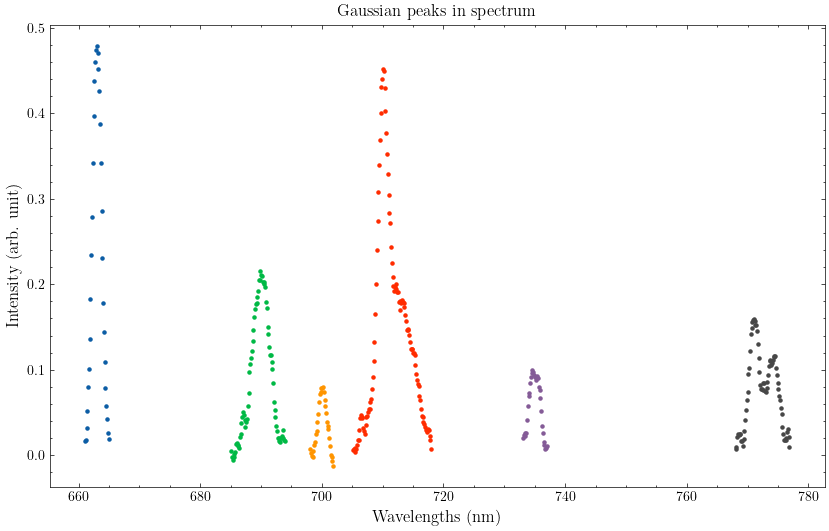

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(peak1_x, peak1_y, s=5)
plt.scatter(peak2_x, peak2_y, s=5)
plt.scatter(peak3_x, peak3_y, s=5)
plt.scatter(peak4_x, peak4_y, s=5)
plt.scatter(peak5_x, peak5_y, s=5)
plt.scatter(peak6_x, peak6_y, s=5)

plt.title("Gaussian peaks in spectrum", fontsize=12)
plt.xlabel("Wavelengths (nm)", fontsize=12)
plt.ylabel("Intensity (arb. unit)", fontsize=12)
plt.show()

Μας ζητείται να προσαρμόσουμε μόνο τις τρεις πρώτες κορυφές καθώς οι υπόλοιπες εμφανίζουν ιδιαιτερότητες που δεν μπορούν να επιλυθούν στα πλαίσια αυτού του project.

Αντί να κάνουμε τρεις φορές την ίδια διαδικασία προσαρμογής, θα προσπαθήσουμε να την αυτοματοποίησουμε χρησιμοποιώντας έναν βρόγχο επανάληψης και αποθηκεύοντας τα δεδομένα της κάθε επανάληψης σε κάποια κατάλληλη δομή (λίστα, λεξικό κτλ) για περαιτέρω χρήση.

Αρχικά θα πρέπει να αρχικοποιήσουμε τις παραμέτρους που θα προσαρμοστούν με κάποιες κατάλληλες τιμές για να μπορέσουμε να βοηθήσουμε τον αλγόριθμο να συγκλίνει σε κάποια λύση.

In [29]:
# Try fitting only the first three peaks
peaks_x = [peak1_x, peak2_x, peak3_x]
peaks_y = [peak1_y, peak2_y, peak3_y]

# Create a dictionary to keep the initialization values
# for each peak. Each key is of the format "key_x"
# where the word 'key' is replaced by one of the fitting parameters (A, mu, sigma)
# and the 'x' is replaced by the number of the peak. For example, mu1 refers
# to the second fitting parameter (mu) of the 1st peak (1)
init_guesses = {}

# keep track of the peak number
n_peak = 0
for x,y in zip(peaks_x, peaks_y):
    n_peak += 1
    A_guess = np.max(y)
    mu_guess = x.iloc[np.argmax(y)]
    
    # A mask to find the indeces where counts = max/2 (half max)
    FWHM_mask = np.where(np.isclose(y, A_guess/2., 0.04))
    
    # The width at half max
    sigma_guess = np.diff(x.iloc[FWHM_mask].values)
    print("Initial guess for peak %d:\nA = %.3f, mu = %.3f, sigma = %.3f\n---" % (n_peak,
                                                                                  A_guess,
                                                                                  mu_guess,
                                                                                  sigma_guess))
    # Add fitting params to dictionary
    init_guesses["A_" + str(n_peak)] = A_guess
    init_guesses["mu_" + str(n_peak)] = mu_guess
    init_guesses["sigma_" + str(n_peak)] = float(sigma_guess)
    
# print(init_guesses)

Initial guess for peak 1:
A = 0.479, mu = 663.001, sigma = 1.820
---
Initial guess for peak 2:
A = 0.216, mu = 689.913, sigma = 3.510
---
Initial guess for peak 3:
A = 0.079, mu = 700.184, sigma = 1.560
---


Έχοντας αρχικοποιήσει τις παραμέτρους που θα προσαρμοστούν για κάθε καμπύλη, μπορούμε να συνεχίσουμε με την προσαρμογή του μαθηματικού μοντέλου.

In [30]:
# keep track of the peak number
n_peak = 0

# Add each pair of (popt, pcov) from fitting each individual peak to a list
popts, pcovs = [], []

for x, y in zip(peaks_x, peaks_y):
    n_peak += 1
    
    # re-create the key formating we used for the dictionary with the initial guesses
    keys = ["A_" + str(n_peak), "mu_" + str(n_peak), "sigma_" + str(n_peak)]
    
    # Fit the gaussian function to the peak and store the results to the corresponding lists
    popt, pcov = so.curve_fit(gauss, x, y, p0=[init_guesses.get(key) for key in keys])
    popts.append(popt)
    pcovs.append(pcov)
    
#     print("Optimal parameters for peak %d" % n_peak)
#     print(popt)
#     print("covariance matrix:")
#     print(pcov)
#     print("---")

Τα αποτελέσματα της προσαρμογής του μαθηματικού μοντέλου πάνω σε κάθε καμπύλη αλλά και η βέλτιστές τιμές των παραμέτρων που μας ενδιαφέρουν φαίνονται στο παρακάτω γράφημα.

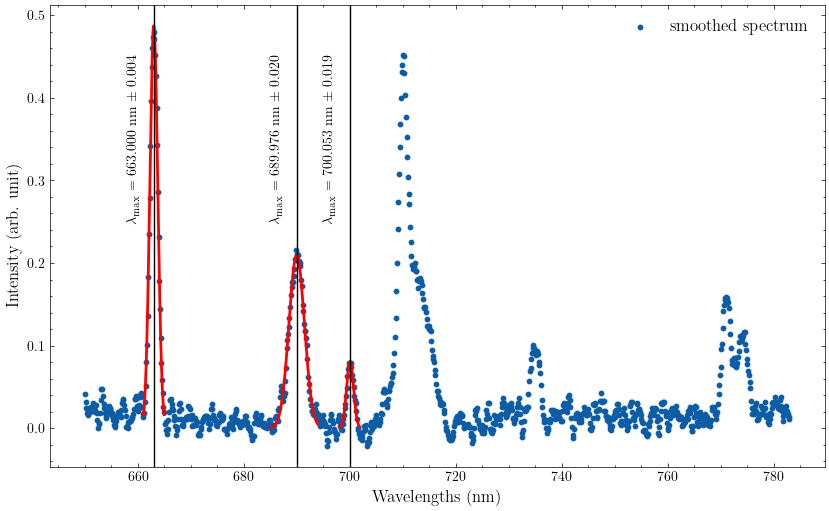

In [31]:
plt.figure(figsize=(10,6))

# For each Gaussian peak plot the data points and
# the fitting function for this peak using the corresponding fitting params
for x, y, popt, pcov in zip(peaks_x, peaks_y, popts, pcovs):

    A_opt, mu_opt, sig_opt = popt # optimal parameters for each distribution
    p_sigma = np.sqrt(np.diag(pcov)) # covariance matric for each distribution
    
    x_model = np.linspace(min(x), max(x), 1000) # x-range for each distribution
    y_model = gauss(x_model, A_opt, mu_opt, sig_opt) # estimated y-values given fit model and optimal parameters
    
    plt.plot(x_model, y_model, color='r', lw=2.0) # plot fitting functions
    plt.axvline(mu_opt, color='black', lw=1) # show with a line the location of estimated peak
    
    # Display some text about the estimated wavelength at peak
    text = r"$\lambda_{\rm max}$ = %.3f nm $\pm$ %.3f" % (mu_opt, p_sigma[1])
    plt.text(mu_opt-5, 0.25, text, rotation=90)

plt.scatter(data["wavelengths"], data["intensity"], s=10, label="smoothed spectrum") # plot data

plt.legend(fontsize=12)
plt.xlabel("Wavelengths (nm)", fontsize=12)
plt.ylabel("Intensity (arb. unit)", fontsize=12)
plt.show()

In [32]:
for i in range(len(popts)):
    p_sigma = np.sqrt(np.diag(pcovs[i]))
    popt = popts[i]
    print("absolute location of max peak %d : %.3f nm +/- %.3f" % (i+1, popt[1], p_sigma[1]))

absolute location of max peak 1 : 663.000 nm +/- 0.004
absolute location of max peak 2 : 689.976 nm +/- 0.020
absolute location of max peak 3 : 700.053 nm +/- 0.019


Για να μετατρέψουμε τα μήκη κύματος σε κυματάριθμους χρησιμοποιούμε την σχέση 

$$k = \frac{1}{\lambda},$$

δίνοντας μεγάλη προσοχή στη μετατροπή των μονάδων: τα μήκη κύματος είναι σε μονάδες nm ενώ οι κυματάριθμοι ζητούνται σε μονάδες cm$^{-1}$.

In [33]:
# Convert wavelengths to wavenumbers and add a separate column in
# the original DataFrame
data["wavenumbers"] = 1 / (data["wavelengths"] * 1e-7)
data

,wavelengths,intensity_raw,intensity,wavenumbers
0,650.000000,0.337532,0.040977,15384.615385
1,650.130010,0.324822,0.031268,15381.538846
2,650.260020,0.279226,0.023872,15378.463537
3,650.390029,0.309586,0.018787,15375.389457
4,650.520039,0.321801,0.016015,15372.316607
...,...,...,...,...
1019,782.479961,0.792565,0.020915,12779.879997
1020,782.609971,0.811578,0.018995,12777.756960
1021,782.739980,0.820834,0.016646,12775.634629
1022,782.869990,0.791326,0.013868,12773.513003


Ας κάνουμε τώρα ένα γράφημα που παρουσιάζει την ίδια πληροφορία με πριν με την μόνη διαφορά ότι αντί για απόλυτα μήκη κύματος, θα έχουμε τους αντίστοιχους απόλυτους κυματάριθμους.

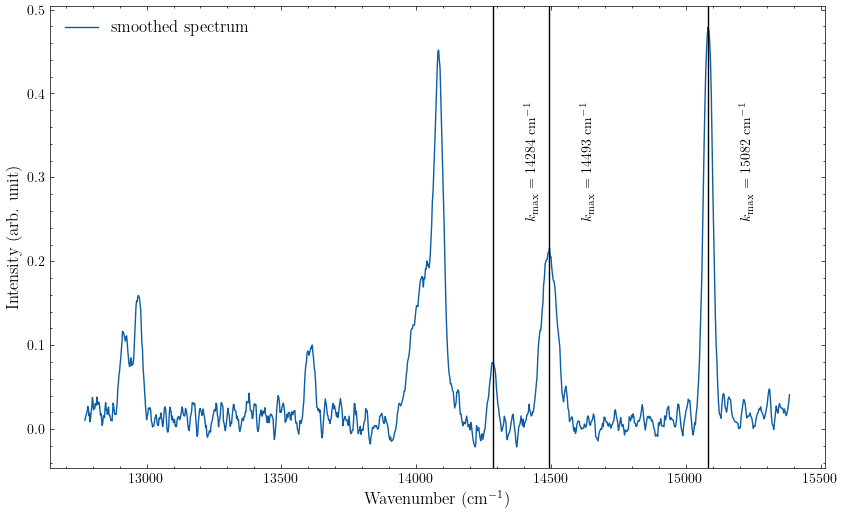

In [34]:
plt.figure(figsize=(10,6))
plt.plot(data["wavenumbers"], data["intensity"], label="smoothed spectrum")

for popt in popts:
    A_opt, mu_opt, sig_opt = popt
    mu_opt = 1/(mu_opt * 1e-7) # convert wavelength in nm to wavenumber in cm^(-1)
    plt.axvline(mu_opt, color='black', lw=1)
    
    # Display some text about the estimated wavenumber at peak
    text = r"$k_{\rm max}$ = %d cm$^{-1}$" % (mu_opt)
    plt.text(mu_opt+120, 0.25, text, rotation=90)


# plt.xlabel(r"Raman shift (cm$^{-1}$)", fontsize=12)
plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=12)
plt.ylabel("Intensity (arb. unit)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

Όπως αναφέρεται και στη θεωρία, τα φάσματα Raman παρουσιάζονται συνήθως κάνοντας χρήση του σχετικού (ως προς το laser) κυματάριθμο. Για να κάνουμε τη μετατροπή από απόλυτους κυματάριθμους σε σχετικούς, πρέπει να γνωρίζουμε το μήκος κύματος του laser με το οποίο καταγράφηκε το φάσμα. Εδώ, αυτό το μήκος κύματος είναι $650$ nm που αντιστοιχεί σε απόλυτο κυματάριθμο $15385$ cm$^{-1}$.

Ο σχετικός κυματάριθμος, λοιπόν, προκύπτει εάν από αυτόν τον απόλυτο κυματάριθμο του laser αφαιρέσουμε τον απόλυτο κυματάριθμο κάθε σημείου του φάσματος.

In [35]:
# Based on our experimental setup
laser_wavelength = 650 # in nm

for i in range(len(popts)):
    popt = 1/(popts[i] * 1e-7) # absolute wavenumber in cm^(-1)
    print("absolute location of max peak %d : %.3f cm^(-1)" % (i+1, popt[1]))
    
    # Convert laser wavelength to wavenumber and subtract it from estimated max
    # This difference is the relative wavenumber
    print("relative location of max peak %d : %.3f cm^(-1)" % (i+1, 1/(laser_wavelength * 1e-7) - popt[1]))
    print("---")

absolute location of max peak 1 : 15082.951 cm^(-1)
relative location of max peak 1 : 301.664 cm^(-1)
---
absolute location of max peak 2 : 14493.265 cm^(-1)
relative location of max peak 2 : 891.350 cm^(-1)
---
absolute location of max peak 3 : 14284.634 cm^(-1)
relative location of max peak 3 : 1099.981 cm^(-1)
---


Ας προσθέσουμε τους σχετικούς κυματάριθμους στο αρχικό DataFrame με τα δεδομένα ώστε να μπορούμε να τους χρησιμοποιήσουμε αργότερα.

Το αντίστοιχο γράφημα με τους σχετικούς κυματάριθμους (Raman shift) στον x-άξονα φαίνεται παρακάτω.

In [36]:
# Convert wavenumbers to raman shift (wavenumbers relative to our laser)
data["rel_wavenumbers"] = 1/(laser_wavelength * 1e-7) - data["wavenumbers"]
data

,wavelengths,intensity_raw,intensity,wavenumbers,rel_wavenumbers
0,650.000000,0.337532,0.040977,15384.615385,0.000000
1,650.130010,0.324822,0.031268,15381.538846,3.076539
2,650.260020,0.279226,0.023872,15378.463537,6.151848
3,650.390029,0.309586,0.018787,15375.389457,9.225927
4,650.520039,0.321801,0.016015,15372.316607,12.298778
...,...,...,...,...,...
1019,782.479961,0.792565,0.020915,12779.879997,2604.735388
1020,782.609971,0.811578,0.018995,12777.756960,2606.858424
1021,782.739980,0.820834,0.016646,12775.634629,2608.980755
1022,782.869990,0.791326,0.013868,12773.513003,2611.102381


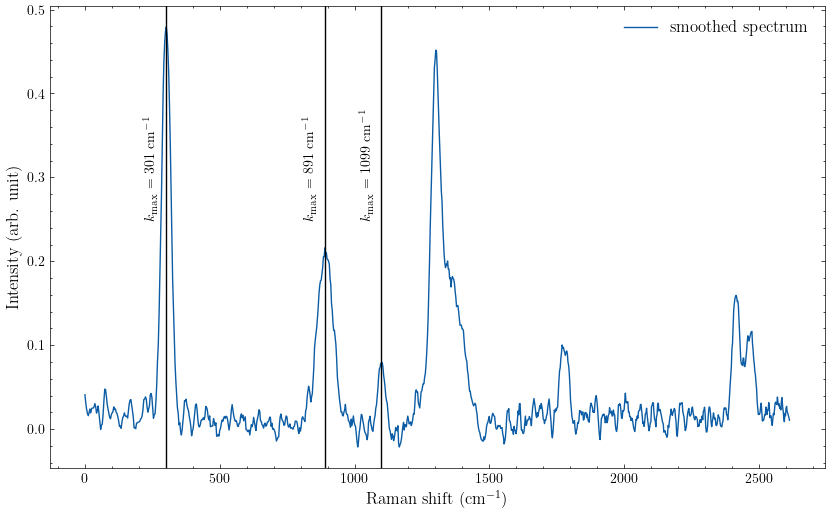

In [37]:
plt.figure(figsize=(10,6))
plt.plot(data["rel_wavenumbers"], data["intensity"], label="smoothed spectrum")

for popt in popts:
    A_opt, mu_opt, sig_opt = popt
    mu_opt = 1/(laser_wavelength * 1e-7) - 1/(mu_opt * 1e-7) # k_laser - k_measured (in cm^-1)
    plt.axvline(mu_opt, color='black', lw=1)
    
    # Display some text about the estimated wavenumber at peak
    text = r"$k_{\rm max}$ = %d cm$^{-1}$" % (mu_opt)
    plt.text(mu_opt-80, 0.25, text, rotation=90)


plt.xlabel(r"Raman shift (cm$^{-1}$)", fontsize=12)
plt.ylabel("Intensity (arb. unit)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

Για να μπορέσουμε να συγκρίνουμε τα αποτελέσματά μας με αυτά που βρίσκονται στη βάση δεδομένων πρέπει να λάβουμε υπόψιν μας ότι και αυτά είναι εκφρασμένα σε σχέση με τον κυματάριθμο του laser που χρησιμοποιήθηκε. Όπως εξηγεί το header του αρχείου, τα δεδομένα αυτά λήφθηκαν με χρήση laser σε μήκος κύματος $632$nm.

Γι' αυτό θα μετατρέψουμε αυτές τις σχετικές θέσεις στη βάση δεδομένων σε απόλυτες τιμές θέσης αφαιρώντας τις από τον κυματάριθμο του laser.

Παρατηρούμε ότι οι σχετικές θέσεις μας δίνονται σε ένα πιθανό εύρος τιμών. Για να μπορέσουμε να αυτοματοποιήσουμε την διαδικασία θα διαχειριστούμε την κάθε εγγραφή ως μία συμβολοσειρά την οποία μπορούμε να διαχωρίσουμε στα επιμέρους στοιχεία της και να κρατήσουμε μόνο αυτά που μας ενδιαφέρουν (τις δύο ακέραιες τιμές που υποδηλώνουν το εύρος).

In [38]:
database = pd.read_csv("test_database.csv", skiprows=8)
database

,Functional group/Vibration,Position (cm^-1),Raman,InfraRed
0,C-C aliphatic chains,412 - 433,medium,strong
1,Se-Se,463 - 489,weak,strong
2,S-S,669 - 676,medium,medium
3,Si-O-Si,676 - 681,weak,strong
4,C-(NO2) asym,728 - 744,medium,weak
5,C-(NO2),742 - 748,weak,medium
6,C-I,748 - 765,weak,strong
7,C-Br,795 - 816,weak,weak
8,C-Cl,816 - 840,weak,strong
9,C-S aliphatic,1200 - 1202,medium,medium


In [39]:
# rename columns for convenience
database.rename({"Functional group/Vibration":"vibration", "Position (cm^-1)":"rel_position"}, axis=1, inplace=True)

In [40]:
# Convert database's relative positions to absolute positions
# given that the laser used is 632 nm
# Then save the converted values as a new column in the database DataFrame
database_laser_wavelength = 632 # in nm

# relative position is a string of an integer range 
for idx, k_range in enumerate(database["rel_position"].values): # here k_range is a single entry of the DataFrame col
    k_range = k_range.split(" - ") # now k_range is a list that holds the two numbers of each integer range
    
    # From parsing the string entry we can isolate and get the 
    # two integer values for the wavenumber range
    max_value = (1/(database_laser_wavelength * 1e-7)) - int(k_range[0])
    min_value = (1/(database_laser_wavelength * 1e-7)) - int(k_range[1])
    
    # Make a new column in the DataFrame with the absolute positions
    database.loc[idx, "abs_position"] = "%d - %d" % (min_value, max_value)

database.head(2)

,vibration,rel_position,Raman,InfraRed,abs_position
0,C-C aliphatic chains,412 - 433,medium,strong,15389 - 15410
1,Se-Se,463 - 489,weak,strong,15333 - 15359


Έχοντας κάνει τις απαραίτητες μετατροπές μπορούμε να ελέγξουμε τώρα αν οι απόλυτες θέσεις των κορυφών στο φάσμα σας βρίσκονται κοντά σε κάποιες από τις (απόλυτες) θέσεις στη βάση δεδομένων. Το τι σημαίνει η μία τιμή να είναι κοντά σε μία άλλη καθορίζεται από εμάς μέσω μιας παραμέτρου "ανέχειας" στη συνάρτηση ``numpy.isclose()``.

Αν η αναζήτησή μας επιστρέψει θετικά αποτελέσματα, μπορούμε να δούμε αυτή η απόλυτη θέση σε τι είδους δόνηση αντιστοιχεί. Σε αυτή την περίπτωση η αναζήτησή μας επιστρέφει και κάποια αποτελέσματα τα οποία είναι προφανώς λάθος αλλά μπορούμε να το διαπιστώσουμε εύκολα και να τα απορρίψουμε (2ο και 3ο αποτέλεσμα). Αυτό οφείλεται στην επιλογή της παραμέτρου ανέχειας όπως είπαμε παραπάνω.

In [41]:
for i in range(len(popts)):
    popt = 1/(popts[i] * 1e-7)
    mu_opt = popt[1] # asbolute wavenumber in cm^(-1)
    
    for vibration, wavenumber in zip(database["vibration"].values, database["abs_position"].values):
            val_range = wavenumber.split(" - ") # parse the entry string
            
            for k in np.linspace(int(val_range[0]), int(val_range[1])+1, int(val_range[1]) - int(val_range[0])):
                if np.isclose(mu_opt, k, 0.0009):
                    print("The wavenumber {} is within the {} range,\n\
                    which corresponds to vibration: {}\n".format(round(mu_opt,0),
                                                               wavenumber,
                                                               vibration
                                                              ))
                    break

The wavenumber 15083.0 is within the 15078 - 15094 range,
                    which corresponds to vibration: C-(NO2) asym

The wavenumber 15083.0 is within the 15074 - 15080 range,
                    which corresponds to vibration: C-(NO2)

The wavenumber 15083.0 is within the 15057 - 15074 range,
                    which corresponds to vibration: C-I

The wavenumber 14493.0 is within the 14504 - 14527 range,
                    which corresponds to vibration: Breathing of carbon ring

The wavenumber 14285.0 is within the 14221 - 14298 range,
                    which corresponds to vibration: C=O mixed with N-H deformation



Έχοντας αναγνωρίσει τις κορυφές μπορούμε να ανανεώσουμε το τελευταίο γράφημα ώστε να συμπεριλαμβάνει αυτή την πληροφορία.

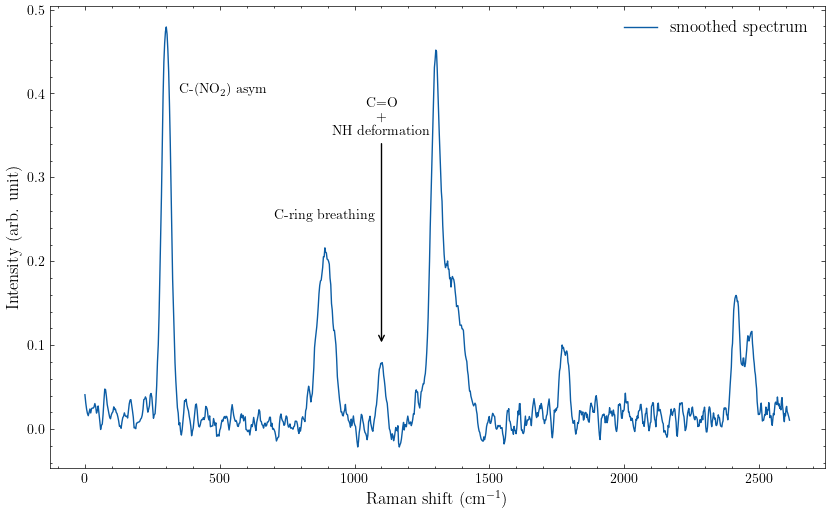

In [42]:
plt.figure(figsize=(10,6))

plt.plot(data["rel_wavenumbers"], data["intensity"], label="smoothed spectrum")


# 1st peak
plt.text(350, 0.4, r"C-(NO$_2$) asym")

# 2nd peak
plt.text(700, 0.25, "C-ring breathing")

# 3rd peak
plt.annotate(
    "C=O\n+\nNH deformation",
    (1_100, 0.1),
    (1_100, 0.35),
    ha="center",
    arrowprops=dict(arrowstyle = "->")
)

plt.xlabel(r"Raman shift (cm$^{-1}$)", fontsize=12)
plt.ylabel("Intensity (arb. unit)", fontsize=12)
plt.legend(fontsize=12)
plt.show()